In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# EDA

In [ ]:
dataset=pd.read_csv("/content/googleplaystore.csv")
dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
dataset.shape

(10841, 13)

In [ ]:
dataset.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset=dataset.dropna(subset=["Rating"])
dataset["Rating"].isnull().sum()

np.int64(0)

In [ ]:
print(dataset["Category"].head(5))
dataset["Category"]=dataset["Category"].str.lower()
dataset["Category"].head(5)

0    ART_AND_DESIGN
1    ART_AND_DESIGN
2    ART_AND_DESIGN
3    ART_AND_DESIGN
4    ART_AND_DESIGN
Name: Category, dtype: object


,Category
0,art_and_design
1,art_and_design
2,art_and_design
3,art_and_design
4,art_and_design


In [ ]:
dataset["Category"].value_counts()

,count
Category,
family,1718
game,1074
tools,734
productivity,334
finance,317
personalization,310
communication,307
lifestyle,305
photography,304


In [ ]:
dataset=dataset.drop(dataset[dataset["Category"]=="1.9"].index)
print(dataset["Category"].isnull().sum())
dataset["Category"].unique()

0


array(['art_and_design', 'auto_and_vehicles', 'beauty',
       'books_and_reference', 'business', 'comics', 'communication',
       'dating', 'education', 'entertainment', 'events', 'finance',
       'food_and_drink', 'health_and_fitness', 'house_and_home',
       'libraries_and_demo', 'lifestyle', 'game', 'family', 'medical',
       'social', 'shopping', 'photography', 'sports', 'travel_and_local',
       'tools', 'personalization', 'productivity', 'parenting', 'weather',
       'video_players', 'news_and_magazines', 'maps_and_navigation'],
      dtype=object)

In [ ]:
dataset["Reviews"]=dataset["Reviews"].astype("int")

In [ ]:
def size_convert(Size):
  if Size=="Varies with device":
    return np.nan
  elif Size[-1]=="M":
    return float(Size.replace("M",""))
  elif Size[-1]=="k":
    return float(Size.replace("k",""))/1000
  else:
    return np.nan

In [ ]:
dataset["Size"]=dataset["Size"].apply(size_convert)

In [ ]:
dataset["Size"].head()

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


In [ ]:
dataset["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
def install_convert(installs):
  installs=installs.replace(",","")
  installs=installs.replace("+","")
  return installs


dataset["Installs"]=dataset["Installs"].apply(install_convert)
dataset["Installs"]=dataset["Installs"].astype("int")

In [ ]:
dataset["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [ ]:
dataset["Type"].isnull().sum()

np.int64(0)

In [ ]:
dataset["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
dataset["Price"].isnull().sum()

np.int64(0)

In [ ]:
dataset["Price"]=dataset["Price"].apply(lambda x:x.replace("$",""))
dataset["Price"]=dataset["Price"].astype("float")

In [ ]:
dataset["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [ ]:
dataset["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
age_map={
    "Everyone":"0+",
    "Teen":"13+",
    "Everyone 10+":"10+",
    "Mature 17+":"17+",
    "Adults only 18+":"18+",
    "Unrated":"Unrated"
}

In [ ]:
dataset["Content Rating"]=dataset["Content Rating"].map(age_map)

In [ ]:
dataset['Content Rating'].value_counts()

,count
Content Rating,
0+,7095
13+,1022
17+,411
10+,360
18+,3
Unrated,1


In [ ]:
dataset["Content Rating"].isnull().sum()

np.int64(0)

In [ ]:
dataset["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [ ]:
def spilt(genre):
  parts=genre.split(";")
  primary=parts[0]
  secondary=parts[1] if len(parts)>1 else "None"
  return pd.Series([primary,secondary])

dataset[["Primary_genre","Secondary_genre"]]=dataset["Genres"].apply(spilt)

In [ ]:
print(dataset[["Genres","Primary_genre","Secondary_genre"]])

                          Genres      Primary_genre Secondary_genre
0                   Art & Design       Art & Design            None
1      Art & Design;Pretend Play       Art & Design    Pretend Play
2                   Art & Design       Art & Design            None
3                   Art & Design       Art & Design            None
4        Art & Design;Creativity       Art & Design      Creativity
...                          ...                ...             ...
10834                  Education          Education            None
10836                  Education          Education            None
10837                  Education          Education            None
10839          Books & Reference  Books & Reference            None
10840                  Lifestyle          Lifestyle            None

[8892 rows x 3 columns]


In [ ]:
dataset["Last Updated"].isnull().sum()

np.int64(0)

In [ ]:
dataset["Last Updated"]=pd.to_datetime(dataset["Last Updated"],errors='coerce')


In [ ]:
dataset['Update_Year']=dataset["Last Updated"].dt.year
dataset["update_month"]=dataset["Last Updated"].dt.month
dataset["Last Updated"]=dataset["Last Updated"].dt.date

In [ ]:
dataset.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)


In [ ]:
dataset.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Primary_genre,Secondary_genre,Update_Year,update_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000,Free,0.0,0+,Art & Design,2018-01-07,Art & Design,None,2018,1
1,Coloring book moana,art_and_design,3.9,967,14.0,500000,Free,0.0,0+,Art & Design;Pretend Play,2018-01-15,Art & Design,Pretend Play,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000,Free,0.0,0+,Art & Design,2018-08-01,Art & Design,None,2018,8
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000,Free,0.0,13+,Art & Design,2018-06-08,Art & Design,None,2018,6
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000,Free,0.0,0+,Art & Design;Creativity,2018-06-20,Art & Design,Creativity,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,family,4.0,7,2.6,500,Free,0.0,0+,Education,2017-06-18,Education,None,2017,6
10836,Sya9a Maroc - FR,family,4.5,38,53.0,5000,Free,0.0,0+,Education,2017-07-25,Education,None,2017,7
10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100,Free,0.0,0+,Education,2018-07-06,Education,None,2018,7
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,NaN,1000,Free,0.0,17+,Books & Reference,2015-01-19,Books & Reference,None,2015,1


In [ ]:
dataset.describe()

,Rating,Reviews,Size,Installs,Price,Update_Year,update_month
count,8892.000000,8.892000e+03,7424.000000,8.892000e+03,8892.000000,8892.000000,8892.000000
mean,4.187877,4.727764e+05,22.747621,1.648965e+07,0.963155,2017.401484,6.424314
std,0.522377,2.905052e+06,23.434790,8.637600e+07,16.189341,1.116673,2.538735
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,2010.000000,1.000000
25%,4.000000,1.640000e+02,5.100000,1.000000e+04,0.000000,2017.000000,5.000000
50%,4.300000,4.714500e+03,14.000000,5.000000e+05,0.000000,2018.000000,7.000000
75%,4.500000,7.126675e+04,33.000000,5.000000e+06,0.000000,2018.000000,8.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018.000000,12.000000


In [ ]:
dataset.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1468
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
dataset.shape

(8892, 15)

In [ ]:
print("mean : ",dataset["Size"].mean())
print("median : ",dataset["Size"].median())
print("median : ",dataset["Size"].max())
print("median : ",dataset["Size"].min())

mean :  22.74762116109914
median :  14.0
median :  100.0
median :  0.0085


In [ ]:
dataset["Size"]=dataset["Size"].fillna(dataset["Size"].median())

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   int64  
 4   Size             8892 non-null   float64
 5   Installs         8892 non-null   int64  
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   float64
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Primary_genre    8892 non-null   object 
 12  Secondary_genre  8892 non-null   object 
 13  Update_Year      8892 non-null   int32  
 14  update_month     8892 non-null   int32  
dtypes: float64(3), int32(2), int64(2), object(8)
memory usage: 1.3+ MB


In [ ]:
dataset.describe()

,Rating,Reviews,Size,Installs,Price,Update_Year,update_month
count,8892.000000,8.892000e+03,8892.000000,8.892000e+03,8892.000000,8892.000000,8892.000000
mean,4.187877,4.727764e+05,21.303457,1.648965e+07,0.963155,2017.401484,6.424314
std,0.522377,2.905052e+06,21.657813,8.637600e+07,16.189341,1.116673,2.538735
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.000000,2010.000000,1.000000
25%,4.000000,1.640000e+02,6.300000,1.000000e+04,0.000000,2017.000000,5.000000
50%,4.300000,4.714500e+03,14.000000,5.000000e+05,0.000000,2018.000000,7.000000
75%,4.500000,7.126675e+04,27.000000,5.000000e+06,0.000000,2018.000000,8.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018.000000,12.000000


## Visuals

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

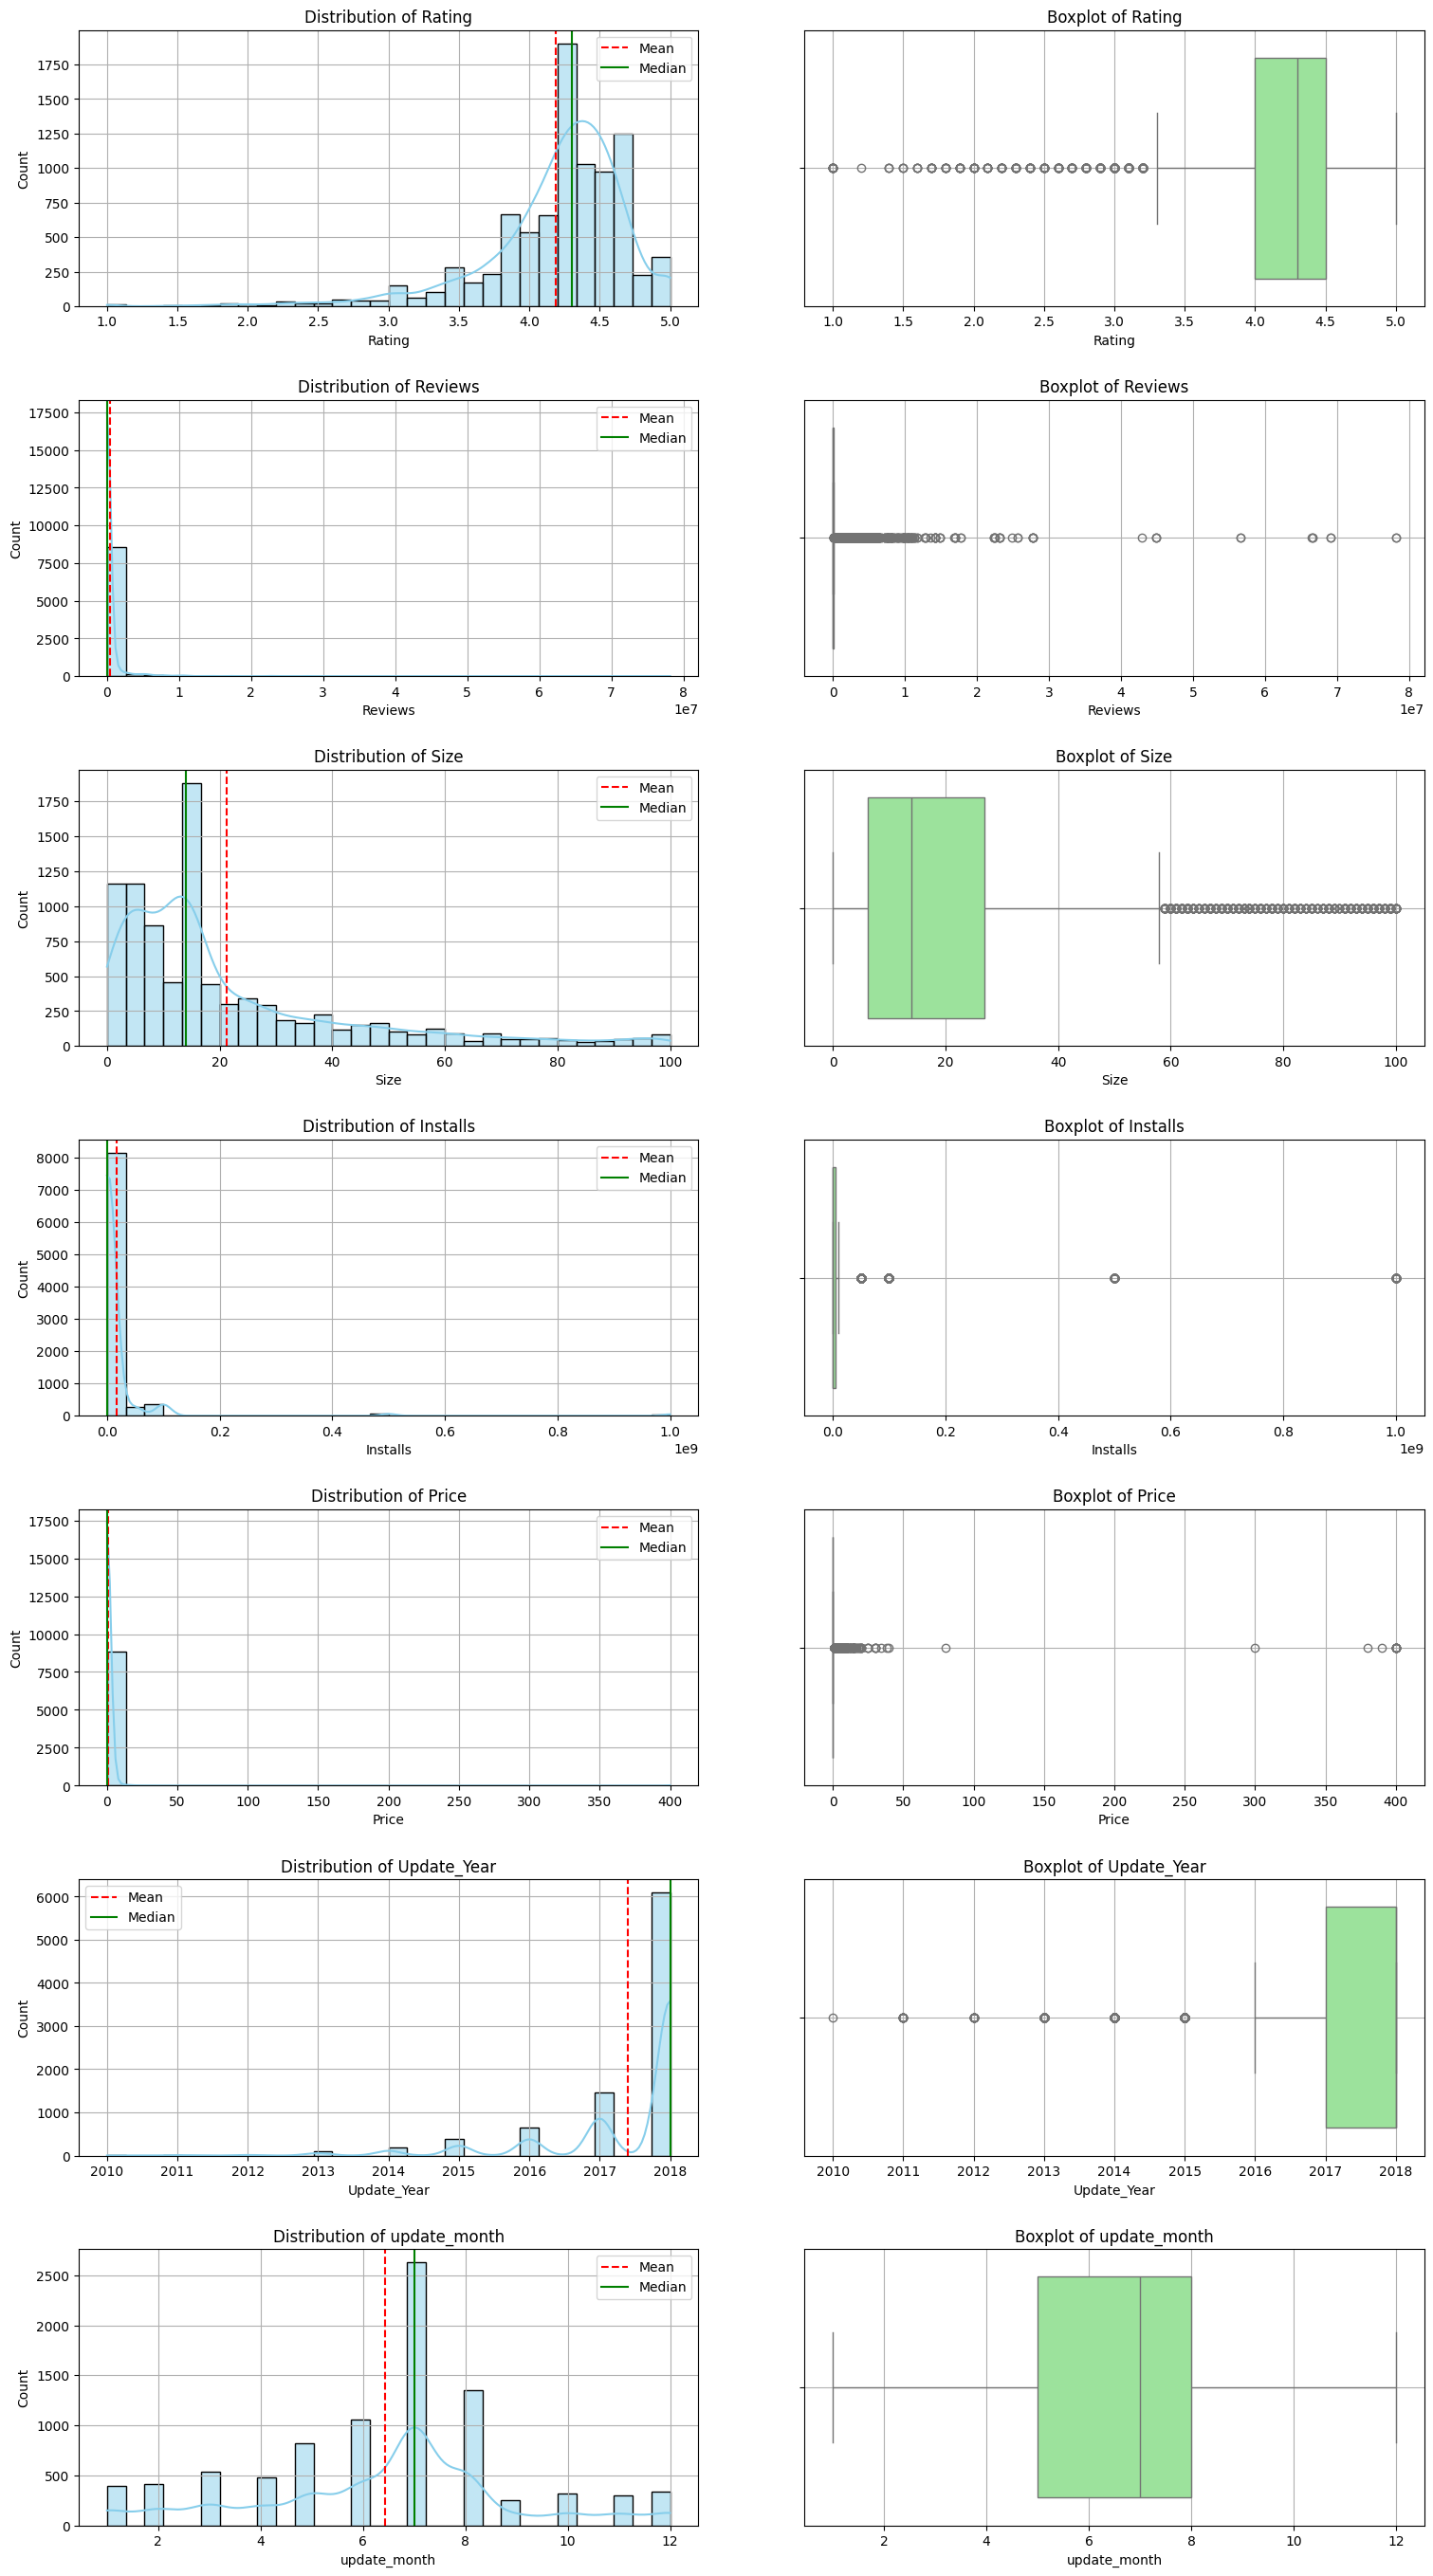

In [ ]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Update_Year', 'update_month']

plt.close('all')
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(16, 28))
fig.tight_layout(pad=5)

for i, col in enumerate(numeric_cols):
    sns.histplot(dataset[col], kde=True, bins=30, color='skyblue', ax=ax[i, 0])
    ax[i,0].axvline(dataset[col].mean(), color='red', linestyle='--', label='Mean')
    ax[i,0].axvline(dataset[col].median(), color='green', linestyle='-', label='Median')
    ax[i,0].set_title(f'Distribution of {col}')
    ax[i,0].legend()
    ax[i,0].grid(True)

    sns.boxplot(x=dataset[col], color='lightgreen', ax=ax[i, 1])
    ax[i, 1].set_title(f'Boxplot of {col}')
    ax[i, 1].grid(True)

plt.show()


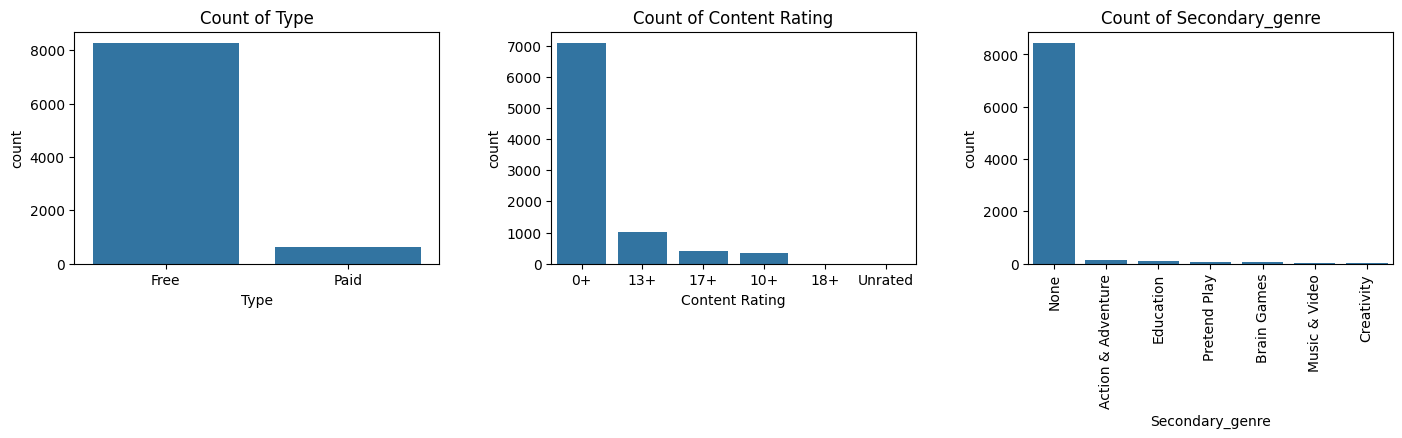

In [ ]:
categorical_cols=['Type', 'Content Rating', 'Secondary_genre']
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,4))
fig.tight_layout(pad=5)
ax=ax.flatten()
for i,col in enumerate(categorical_cols):
  sns.countplot(x=dataset[col],order=dataset[col].value_counts().index,ax=ax[i])
  plt.xticks(rotation=90)
  ax[i].set_title(f"Count of {col}")
plt.show()

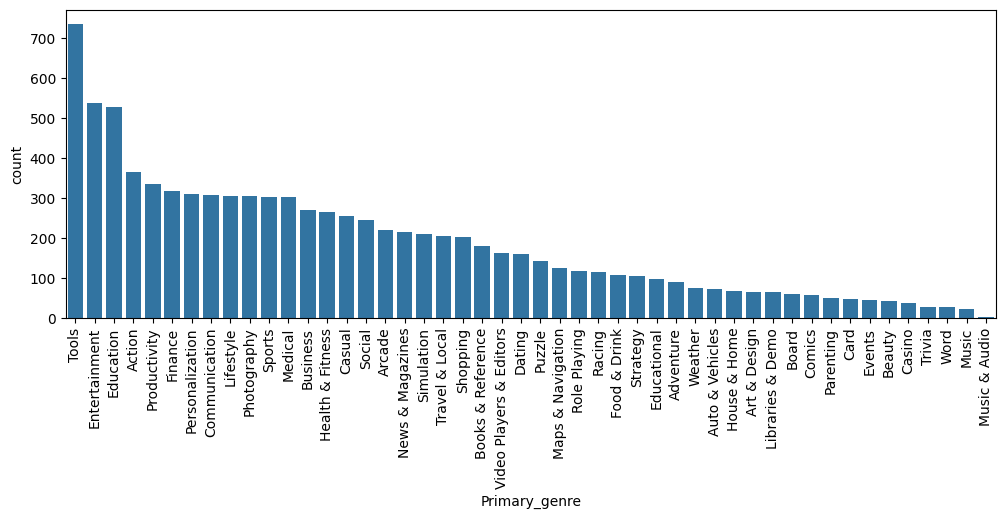

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x=dataset["Primary_genre"], order=dataset["Primary_genre"].value_counts().index)
plt.xticks(rotation=90)
# plt.title('Count of Category')
plt.show()

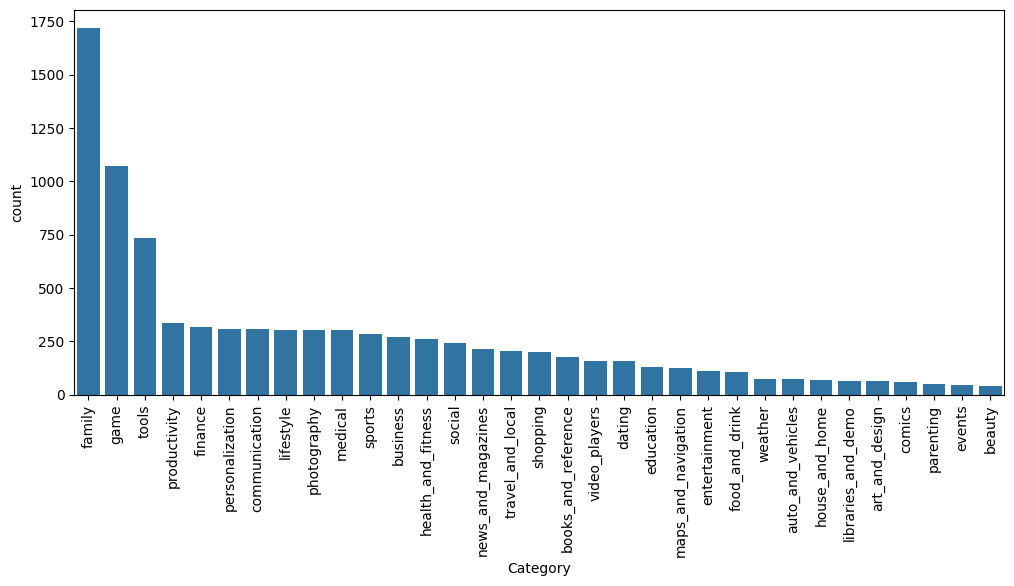

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=dataset["Category"],order=dataset["Category"].value_counts().index)
plt.xticks(rotation=90)
# plt.title("Count of Category")
plt.show()

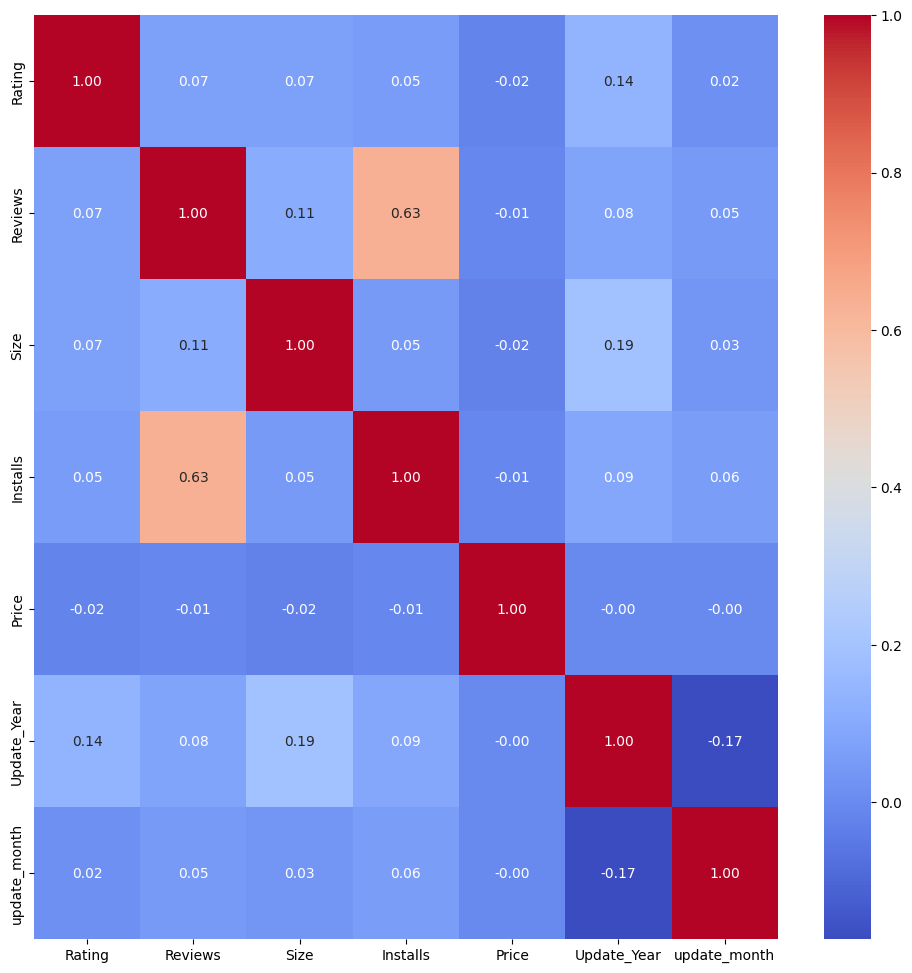

In [ ]:
plt.figure(figsize=(12,12))
corr_matrix=dataset[numeric_cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
# plt.title("Correlation Heatmap")
plt.show()

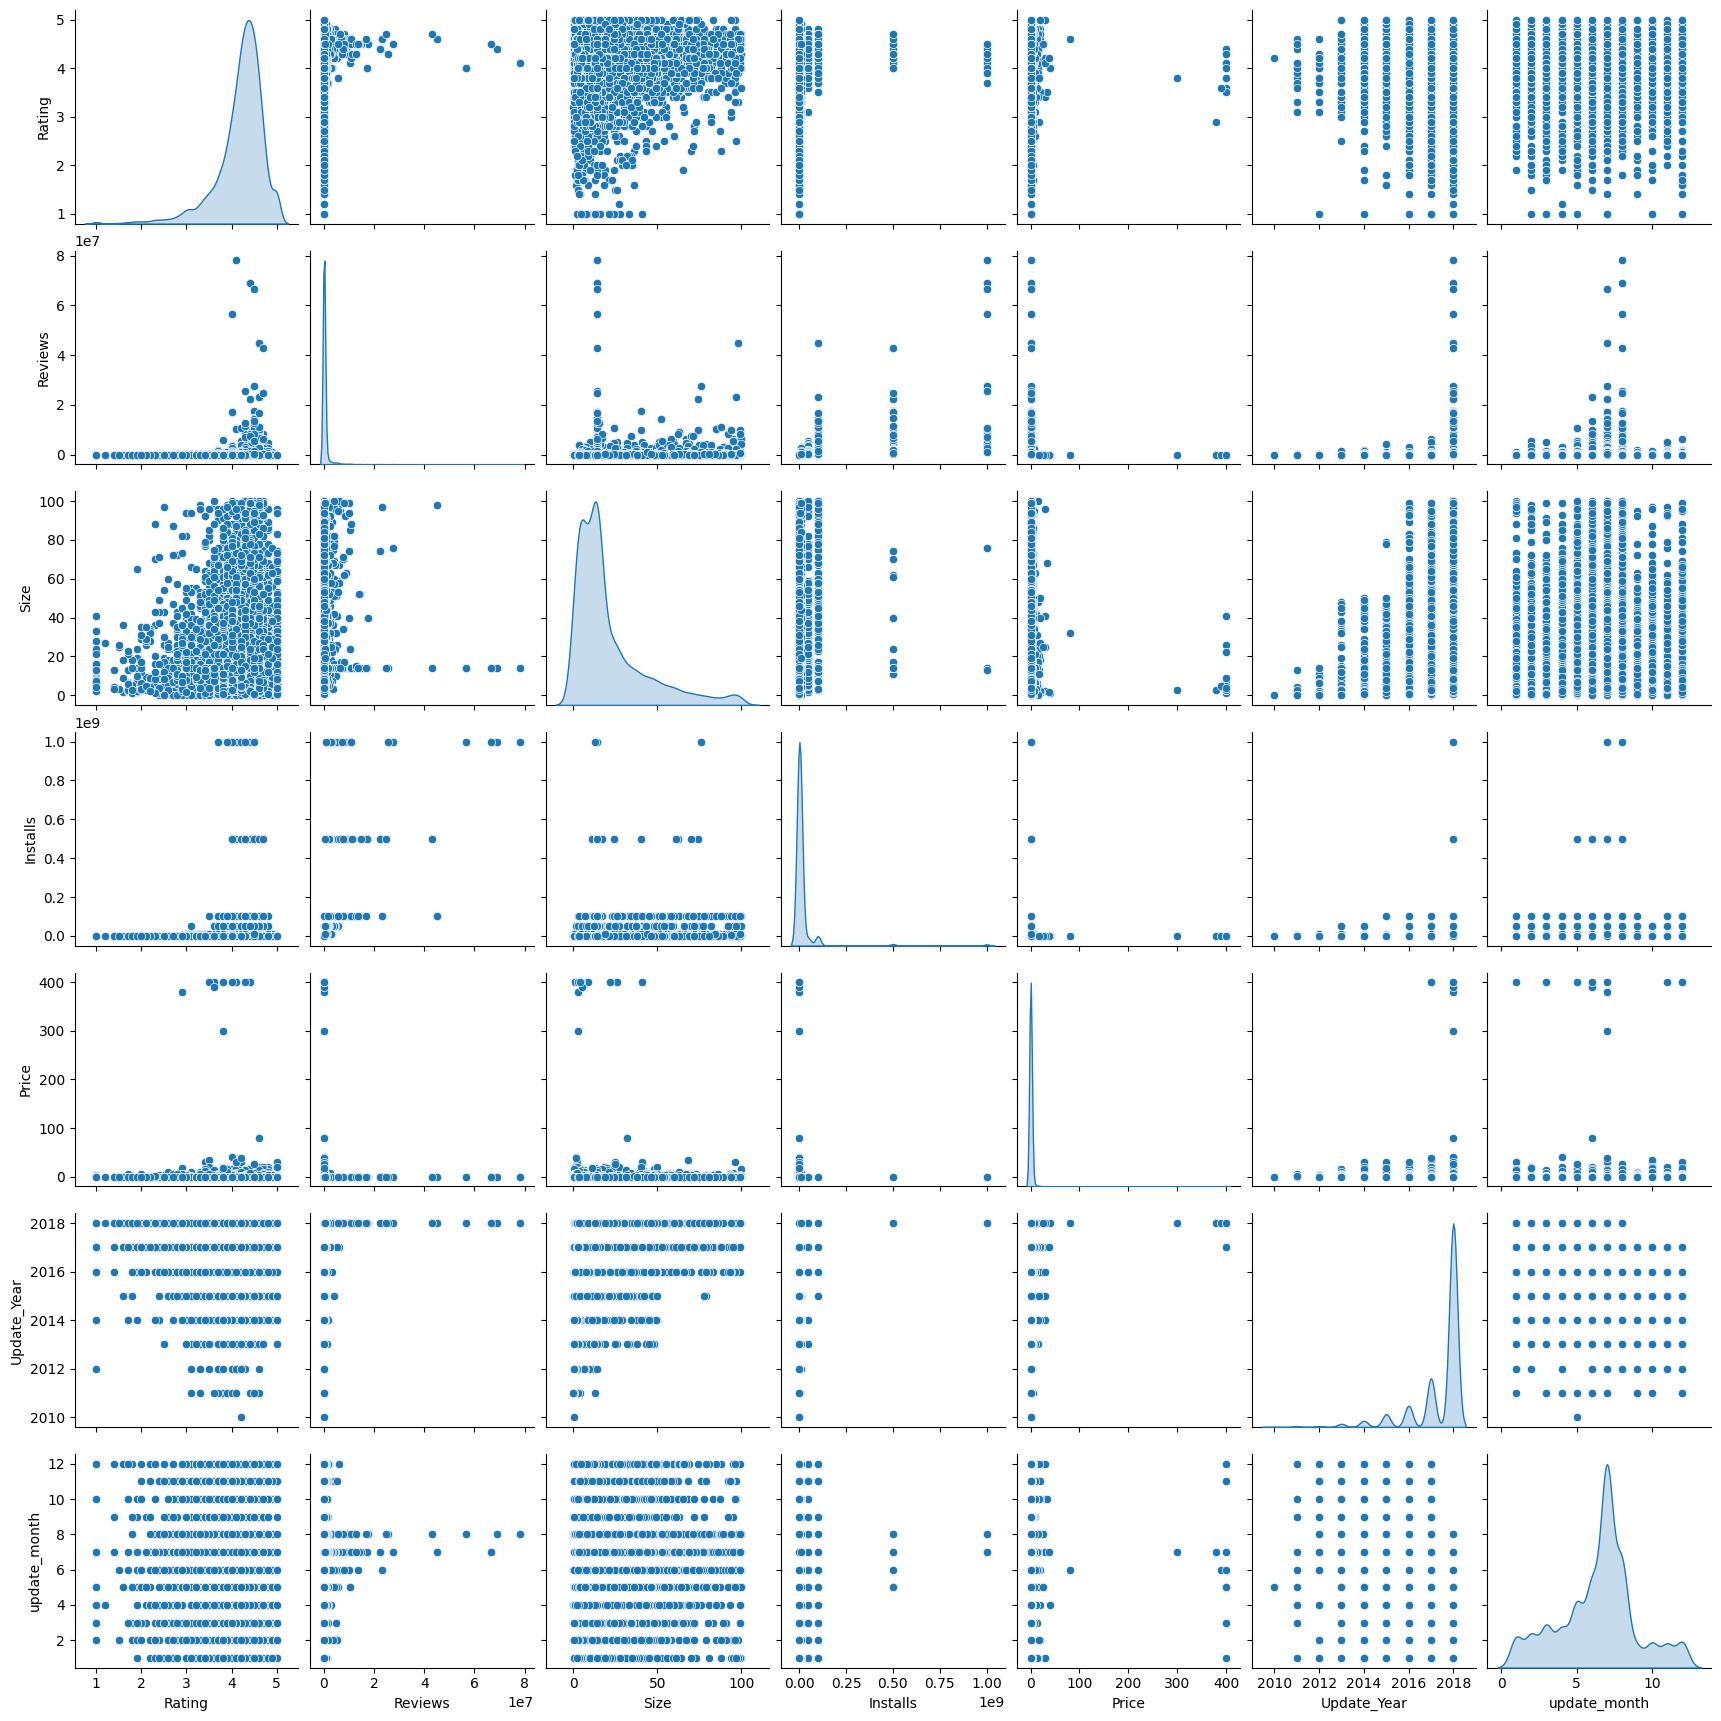

In [ ]:
sns.pairplot(dataset,diag_kind="kde")
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 63.3% of the points cannot be plac

TypeError: 'str' object is not callable

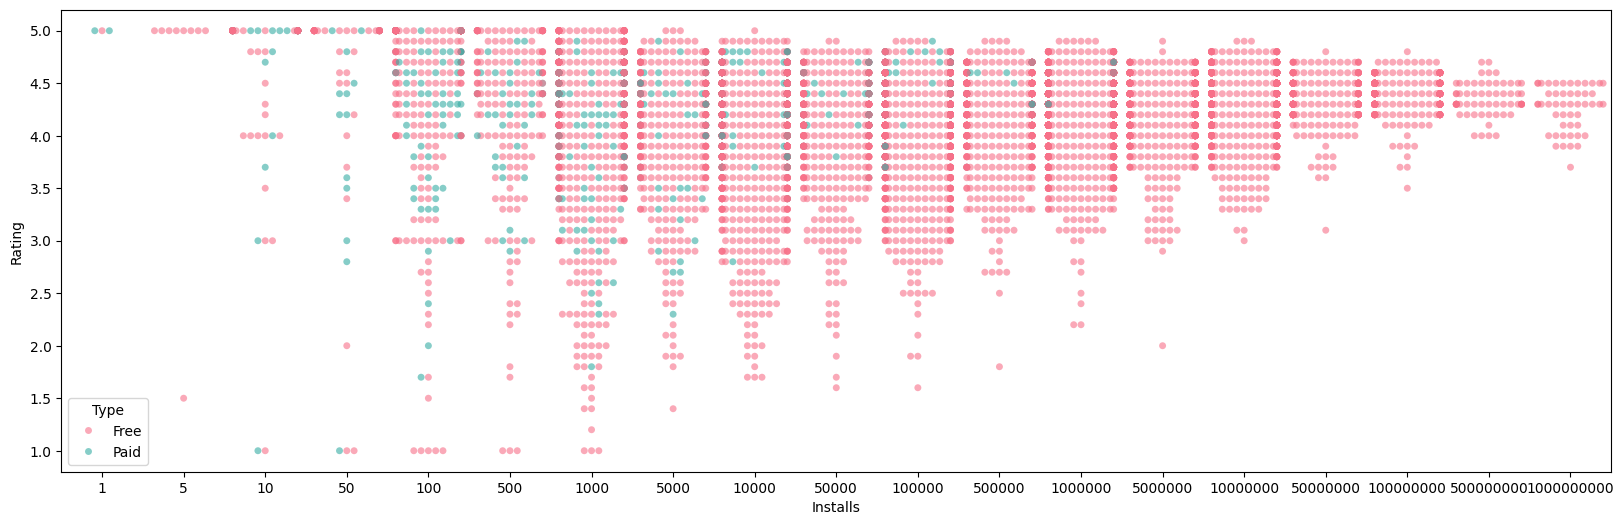

In [ ]:
plt.figure(figsize=(20,6))
sns.swarmplot(x="Installs",y="Rating",hue="Type",data=dataset,alpha=0.6,palette="husl")
plt.title("Installs vs Rating by App Type")
plt.show()


TypeError: 'str' object is not callable

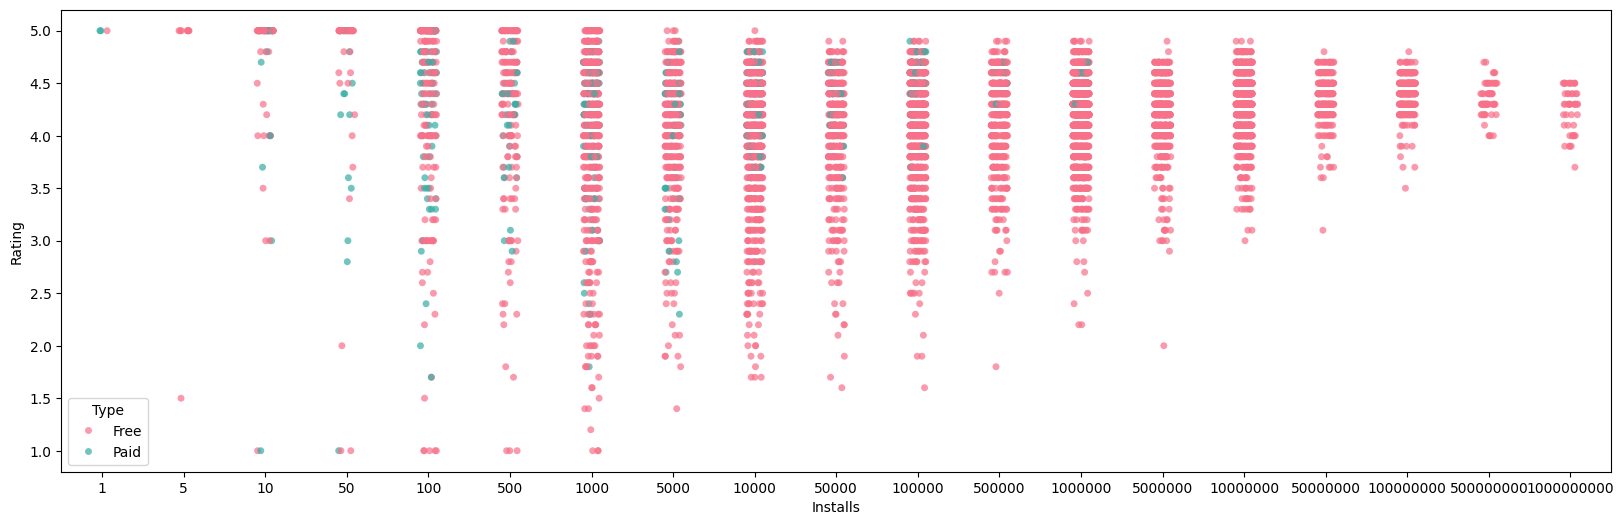

In [ ]:
plt.figure(figsize=(20,6))
sns.stripplot(x="Installs",y="Rating",hue="Type",data=dataset,alpha=0.7,palette="husl")
plt.title("Installs vs Rating by App Type")
plt.show()


TypeError: 'str' object is not callable

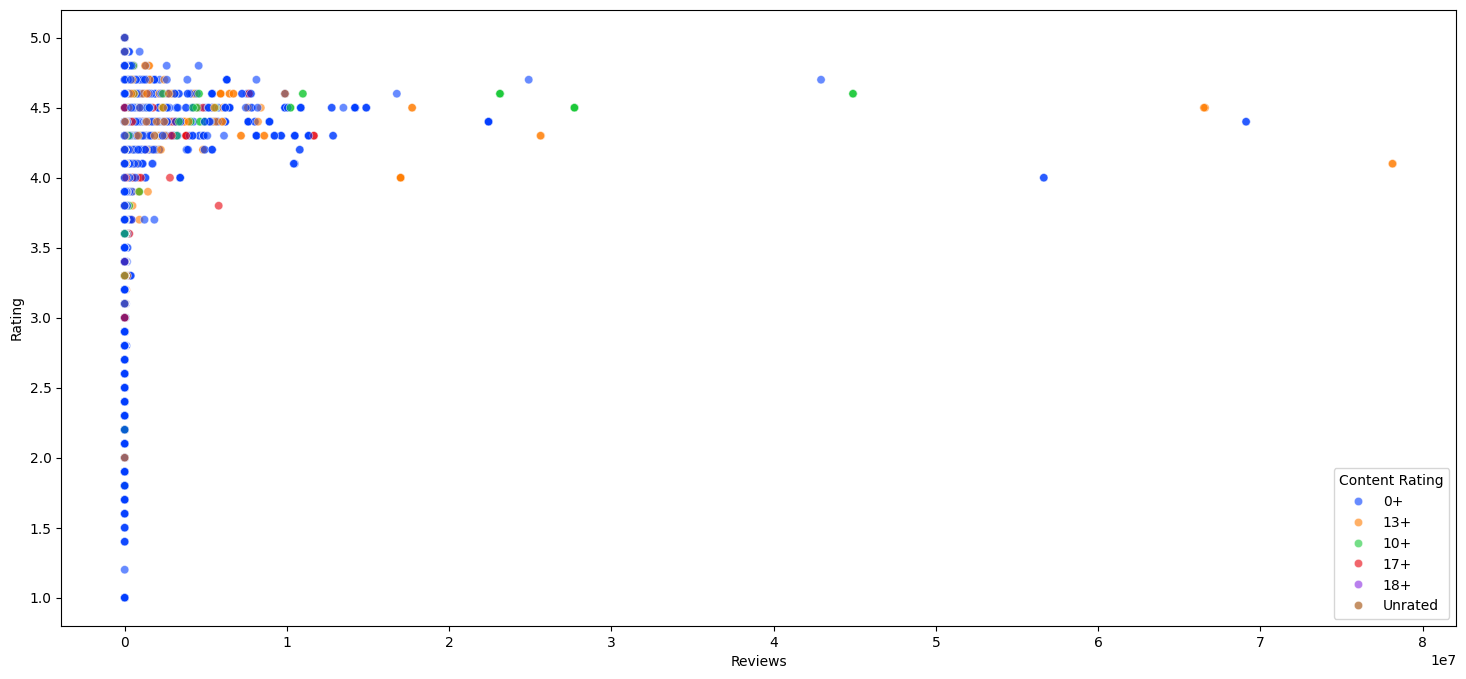

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(x="Reviews",y="Rating",hue="Content Rating",data=dataset,palette="bright",alpha=0.6)
plt.title("Reviews vs Rating by Content Rating")
plt.show()

TypeError: 'str' object is not callable

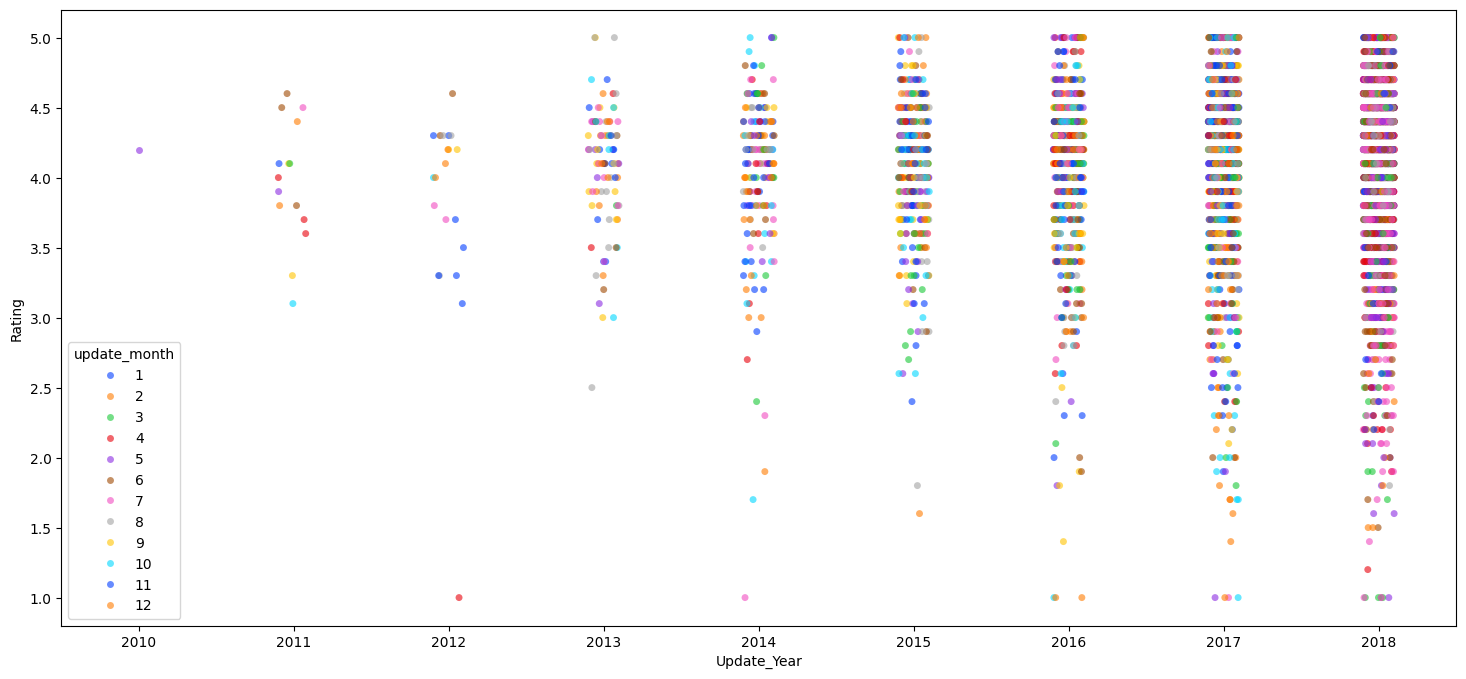

In [ ]:
plt.figure(figsize=(18,8))
sns.stripplot(x="Update_Year",y="Rating",data=dataset,hue="update_month",alpha=0.6,palette="bright")
plt.title("Update Year vs Rating")
plt.show()

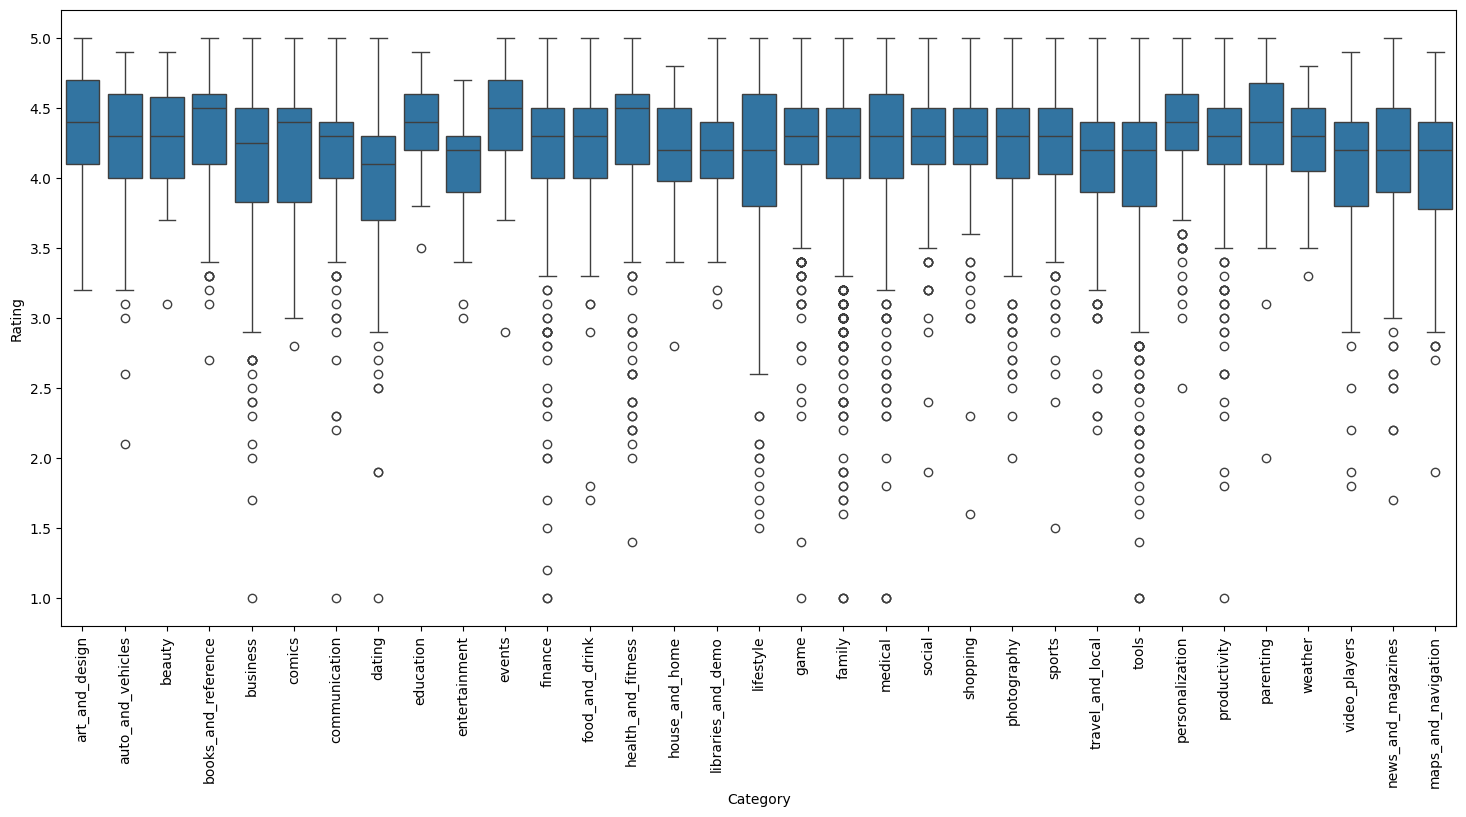

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(x="Category",y="Rating",data=dataset)
# plt.title=("Rating vs Category")
plt.xticks(rotation=90)
plt.show()

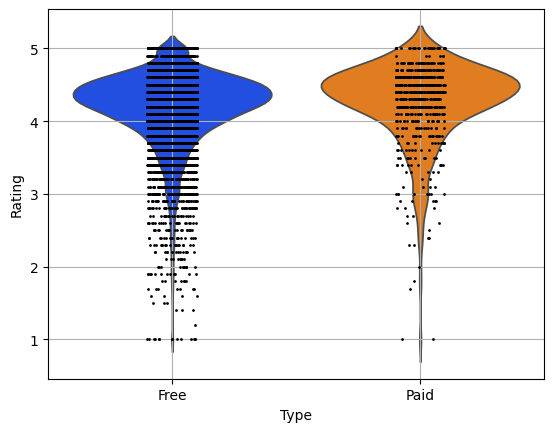

In [ ]:
sns.violinplot(x='Type', y='Rating', data=dataset, inner=None,hue="Type",palette="bright")
sns.stripplot(x='Type', y='Rating', data=dataset, color='black', size=2)
plt.grid(True)
plt.show()


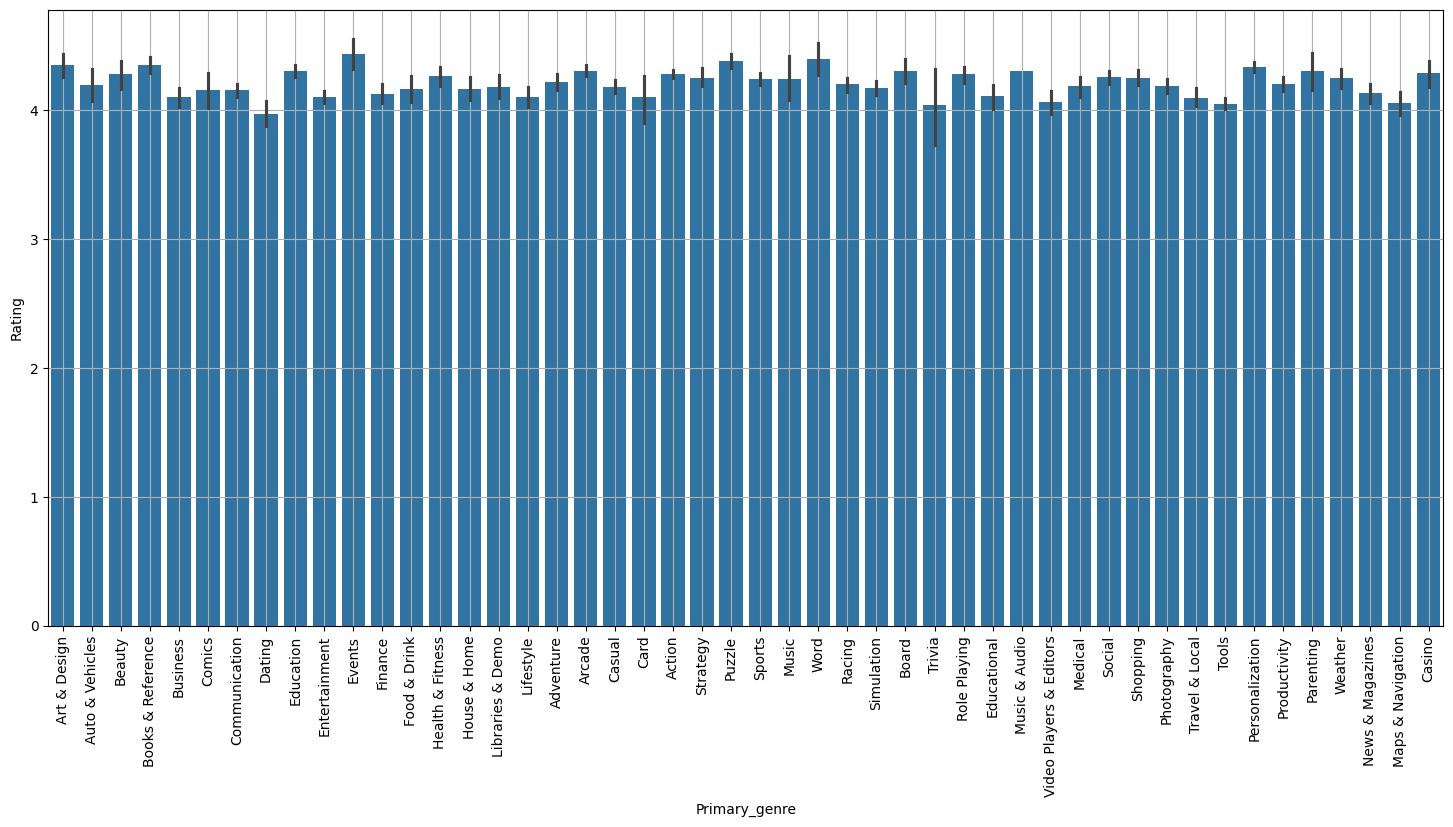

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x="Primary_genre",y="Rating",data=dataset,estimator="mean")
plt.xticks(rotation=90)
plt.grid(True)
# plt.title("Avg. Rating vs Primary Genre")

plt.show()

# Preprocessing

In [ ]:
X=dataset.drop(columns=["Rating","App","Genres","Last Updated"],axis=1)
y=dataset["Rating"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)


In [ ]:
skew_features=['Reviews', 'Installs', 'Price', 'Size']
pt=PowerTransformer(method="yeo-johnson")
X_train_transformed=pt.fit_transform(X_train[skew_features])
X_test_transformed=pt.transform(X_test[skew_features])

In [ ]:
X_train[skew_features]=X_train_transformed
X_test[skew_features]=X_test_transformed

In [ ]:
dataset[skew_features].min()

,0
Reviews,1.0000
Installs,1.0000
Price,0.0000
Size,0.0085


In [ ]:
X_train.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Primary_genre,Secondary_genre,Update_Year,update_month
1807,game,0.860900,-0.000752,0.844072,Free,-0.268033,10+,2018-07-31,Strategy,None,2018,7
6017,productivity,-0.711052,-1.075834,-0.803774,Free,-0.268033,0+,2016-06-22,Productivity,None,2016,6


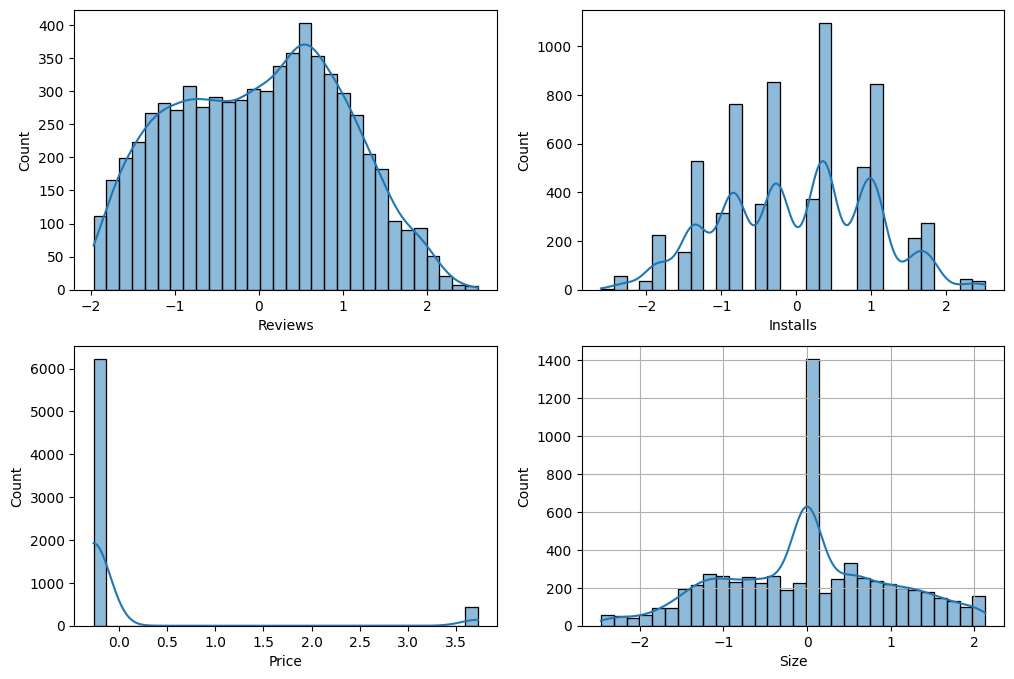

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
for i,col in enumerate(skew_features):
    sns.histplot(X_train[col], kde=True, bins=30,ax=ax[i])
    # plt.title(f'Distribution of Transformed {col}')
    plt.grid(True)
plt.show()


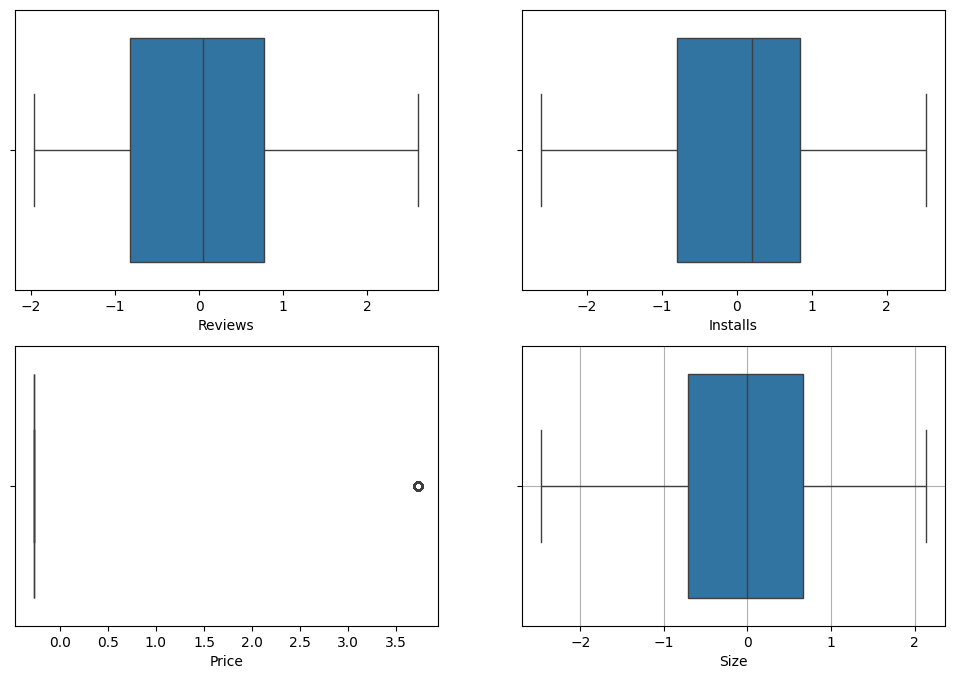

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
for i,col in enumerate(skew_features):
    sns.boxplot(x=X_train[col],ax=ax[i])
    # plt.title(f'Boxplot of Transformed {col}')
plt.grid(True)
plt.show()


TypeError: 'str' object is not callable

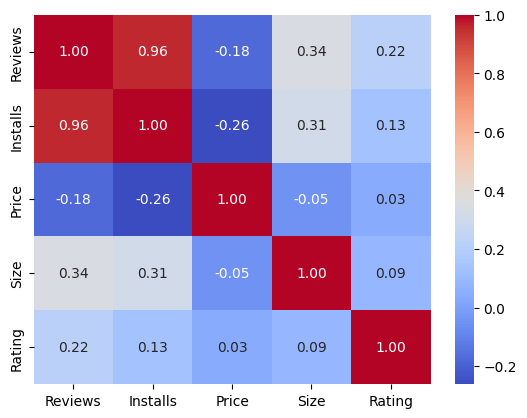

In [ ]:
import pandas as pd

temp_df = X_train[skew_features].copy()
temp_df['Rating'] = y_train.values


sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation After Transformation')
plt.show()


In [ ]:
X_train["Type"]=pd.get_dummies(X_train["Type"],drop_first=True)
X_test["Type"]=pd.get_dummies(X_test["Type"],drop_first=True)

In [ ]:
X_train['Update_Year'] = X_train['Update_Year'].astype(str)
X_test['Update_Year'] = X_test['Update_Year'].astype(str)

le=LabelEncoder()
cat_col = ["Content Rating", "Primary_genre", "Secondary_genre", "Category", "Update_Year"]

for col in cat_col:
    le = LabelEncoder()
    combined = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined)

    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])




In [ ]:
X_train["month_sin"]=np.sin(2*np.pi*X_train["update_month"]/12)
X_train["month_cos"]=np.cos(2*np.pi*X_train["update_month"]/12)

X_test["month_sin"]=np.sin(2*np.pi*X_test["update_month"]/12)
X_test["month_cos"]=np.cos(2*np.pi*X_test["update_month"]/12)

X_train.drop(columns=['update_month'], inplace=True)
X_test.drop(columns=['update_month'], inplace=True)

In [ ]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Columns:", X_train.columns.tolist())

Train shape: (6669, 13)
Test shape: (2223, 13)
Columns: ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated', 'Primary_genre', 'Secondary_genre', 'Update_Year', 'month_sin', 'month_cos']


In [ ]:
X_train.head(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Primary_genre,Secondary_genre,Update_Year,month_sin,month_cos
1807,14,0.860900,-0.000752,0.844072,False,-0.268033,1,2018-07-31,41,5,16,-5.000000e-01,-0.866025
6017,25,-0.711052,-1.075834,-0.803774,False,-0.268033,0,2016-06-22,33,5,14,1.224647e-16,-1.000000
3559,25,0.475308,-0.000752,0.386736,False,-0.268033,0,2018-07-12,33,5,16,-5.000000e-01,-0.866025


In [ ]:
X_train.drop("Last Updated",axis=1,inplace=True)
X_test.drop("Last Updated",axis=1,inplace=True)

In [ ]:
X_train.head(3)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Primary_genre,Secondary_genre,Update_Year,month_sin,month_cos
1807,14,0.860900,-0.000752,0.844072,False,-0.268033,1,41,5,16,-5.000000e-01,-0.866025
6017,25,-0.711052,-1.075834,-0.803774,False,-0.268033,0,33,5,14,1.224647e-16,-1.000000
3559,25,0.475308,-0.000752,0.386736,False,-0.268033,0,33,5,16,-5.000000e-01,-0.866025


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 1807 to 8751
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         6669 non-null   int64  
 1   Reviews          6669 non-null   float64
 2   Size             6669 non-null   float64
 3   Installs         6669 non-null   float64
 4   Type             6669 non-null   bool   
 5   Price            6669 non-null   float64
 6   Content Rating   6669 non-null   int64  
 7   Primary_genre    6669 non-null   int64  
 8   Secondary_genre  6669 non-null   int64  
 9   Update_Year      6669 non-null   int64  
 10  month_sin        6669 non-null   float64
 11  month_cos        6669 non-null   float64
dtypes: bool(1), float64(6), int64(5)
memory usage: 889.8 KB


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
abs=mean_absolute_error(y_test,y_pred)

print(f"Baseline RMSE: {rmse:.4f}")
print(f"Baseline R² Score: {r2:.4f}")
print(f"Baseline Absolute Error: {abs:.4f}")


NameError: name 'X_train' is not defined

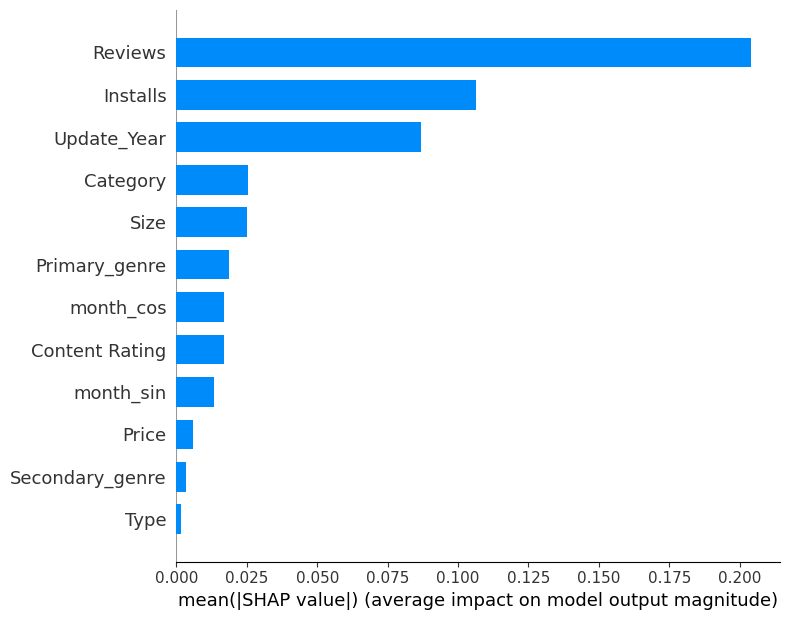

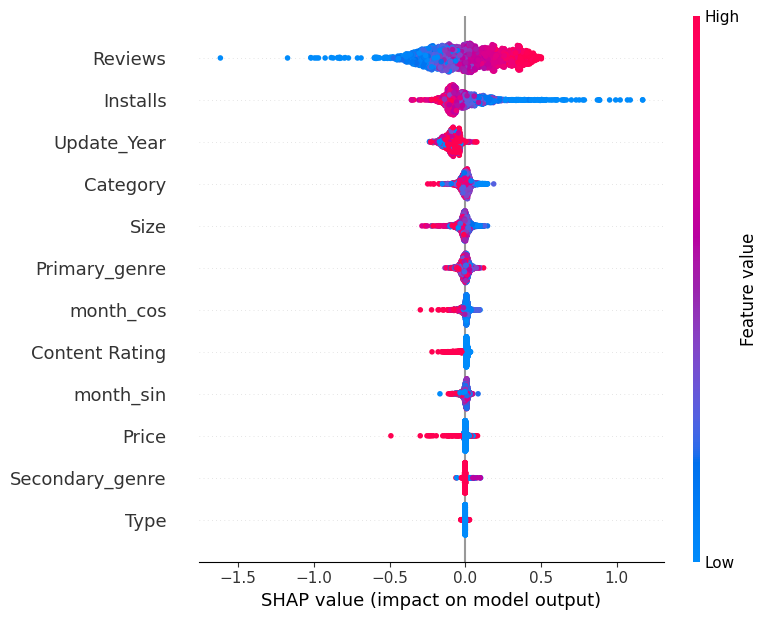

In [ ]:
import shap

explainer = shap.TreeExplainer(rf_model,model_output="raw")
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_rf.fit(X_train, y_train)

rf_best = grid_rf.best_estimator_
rf_pred = rf_best.predict(X_test)

print("Random Forest")
print("Best Params:", grid_rf.best_params_)
print("RMSE:", mean_squared_error(y_test, rf_pred))
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R²:", r2_score(y_test, rf_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest
Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
RMSE: 0.24609599371960209
MAE: 0.3543515736582039
R²: 0.08302916123291237


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_gb.fit(X_train, y_train)

gb_best = grid_gb.best_estimator_
gb_pred = gb_best.predict(X_test)

print("\nGradient Boosting")
print("Best Params:", grid_gb.best_params_)
print("RMSE:", mean_squared_error(y_test, gb_pred))
print("MAE:", mean_absolute_error(y_test, gb_pred))
print("R²:", r2_score(y_test, gb_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Gradient Boosting
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
RMSE: 0.24532556411808312
MAE: 0.35684275694376694
R²: 0.08589983566868054


In [ ]:
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), param_grid_xgb, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_xgb.fit(X_train, y_train)

xgb_best = grid_xgb.best_estimator_
xgb_pred = xgb_best.predict(X_test)

print("\nXGBoost")
print("Best Params:", grid_xgb.best_params_)
print("RMSE:", mean_squared_error(y_test, xgb_pred))
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("R²:", r2_score(y_test, xgb_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits

XGBoost
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
RMSE: 0.23704841408453028
MAE: 0.3499616151450187
R²: 0.11674107405761502


In [ ]:
from sklearn.svm import SVR

param_grid_svr = {
    'kernel': ['rbf'],
    'C': [1, 10],
    'epsilon': [0.1, 0.2],
    'gamma': ['scale']
}

grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_svr.fit(X_train, y_train)

svr_best = grid_svr.best_estimator_
svr_pred = svr_best.predict(X_test)

print("\nSVR")
print("Best Params:", grid_svr.best_params_)
print("RMSE:", mean_squared_error(y_test, svr_pred))
print("MAE:", mean_absolute_error(y_test, svr_pred))
print("R²:", r2_score(y_test, svr_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits

SVR
Best Params: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
RMSE: 0.279570787597819
MAE: 0.4183287674694642
R²: -0.041700255756450755


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [False, True]
}



grid_lr = GridSearchCV(
    LinearRegression(),
    param_grid_lr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)
grid_lr.fit(X_train, y_train)


lr_best = grid_lr.best_estimator_
lr_pred = lr_best.predict(X_test)


print("\nLinear Regression (GridSearchCV)")
print("Best Params:", grid_lr.best_params_)
print("RMSE:", mean_squared_error(y_test, lr_pred))
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R²:", r2_score(y_test, lr_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits

Linear Regression (GridSearchCV)
Best Params: {'copy_X': True, 'fit_intercept': False, 'positive': False}
RMSE: 0.2526955832111304
MAE: 0.3672985894957483
R²: 0.05843863044003683


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_dt.fit(X_train, y_train)
dt_best = grid_dt.best_estimator_
dt_pred = dt_best.predict(X_test)

print("\nDecision Tree")
print("Best Params:", grid_dt.best_params_)
print("RMSE:", mean_squared_error(y_test, dt_pred))
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("R²:", r2_score(y_test, dt_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Decision Tree
Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
RMSE: 0.25129441484559367
MAE: 0.3452604343737127
R²: 0.06365948150705592


In [ ]:
pd.concat([X_train.head(20), y_train.head(20)], axis=1)


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Primary_genre,Secondary_genre,Update_Year,month_sin,month_cos,Rating
1807,14,0.860900,-0.000752,0.844072,False,-0.268033,1,41,5,16,-5.000000e-01,-8.660254e-01,4.6
6017,25,-0.711052,-1.075834,-0.803774,False,-0.268033,0,33,5,14,1.224647e-16,-1.000000e+00,4.3
3559,25,0.475308,-0.000752,0.386736,False,-0.268033,0,33,5,16,-5.000000e-01,-8.660254e-01,4.6
4540,11,-1.393115,-1.483741,-0.803774,False,-0.268033,0,15,5,15,-1.000000e+00,-1.836970e-16,4.1
861,9,0.851506,-0.000752,0.844072,False,-0.268033,0,17,5,16,1.224647e-16,-1.000000e+00,4.2
2711,26,1.054407,1.158020,1.048097,False,-0.268033,0,37,5,16,-5.000000e-01,-8.660254e-01,4.3
691,7,-1.040182,0.963956,-0.968828,False,-0.268033,3,14,5,16,-8.660254e-01,-5.000000e-01,3.5
7235,14,0.951012,0.732992,0.844072,False,-0.268033,2,0,5,16,-5.000000e-01,-8.660254e-01,4.3
8299,29,1.276621,-0.314861,1.538892,False,-0.268033,0,42,5,16,-8.660254e-01,-5.000000e-01,4.1
8926,25,1.471542,-0.071368,1.048097,False,-0.268033,0,33,5,16,-8.660254e-01,-5.000000e-01,4.6


from matplotlib import pyplot as plt
_df_0['Category'].plot(kind='hist', bins=20, title='Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Reviews'].plot(kind='hist', bins=20, title='Reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Installs'].plot(kind='hist', bins=20, title='Installs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Category', y='Reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Reviews', y='Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Size', y='Installs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Installs', y='Content Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Price']
  ys = series['Category']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price')
_ = plt.ylabel('Category')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Price']
  ys = series['Reviews']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price')
_ = plt.ylabel('Reviews')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Price']
  ys = series['Size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Price']
  ys = series['Installs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price')
_ = plt.ylabel('Installs')

from matplotlib import pyplot as plt
_df_12['Category'].plot(kind='line', figsize=(8, 4), title='Category')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Reviews'].plot(kind='line', figsize=(8, 4), title='Reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Installs'].plot(kind='line', figsize=(8, 4), title='Installs')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
y_class_train = pd.cut(y_train, bins=[0, 3.9, 4.3, 4.6, 5.0], labels=['Low', 'Medium', 'High', 'Excellent'])
y_class_test = pd.cut(y_test, bins=[0, 3.9, 4.3, 4.6, 5.0], labels=['Low', 'Medium', 'High', 'Excellent'])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_class_train.shape)
print("y_class_train shape:", y_class_train.shape)


(6669, 12)
(6669,)
(6669,)
y_class_train shape: (6669,)


In [ ]:
y_class_train.value_counts()


,count
Rating,
Medium,2324
High,2049
Low,1492
Excellent,804


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_class_train)
print(X_resampled.shape)
print(y_resampled.shape)

(9296, 12)
(9296,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy', 
    n_jobs=-1,
    verbose=2
)

grid_dt.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
from sklearn.metrics import classification_report

dt_best = grid_dt.best_estimator_
y_pred_class = dt_best.predict(X_test)

print("Best Params:", grid_dt.best_params_)
print(classification_report(y_class_test, y_pred_class))


Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

   Excellent       0.34      0.24      0.28       266
        High       0.54      0.36      0.43       728
         Low       0.28      0.41      0.33       453
      Medium       0.42      0.48      0.45       776

    accuracy                           0.40      2223
   macro avg       0.40      0.37      0.37      2223
weighted avg       0.42      0.40      0.40      2223



In [ ]:
X_resampled.head(20)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Primary_genre,Secondary_genre,Update_Year,month_sin,month_cos
0,14,0.860900,-0.000752,0.844072,False,-0.268033,1,41,5,16,-5.000000e-01,-8.660254e-01
1,25,-0.711052,-1.075834,-0.803774,False,-0.268033,0,33,5,14,1.224647e-16,-1.000000e+00
2,25,0.475308,-0.000752,0.386736,False,-0.268033,0,33,5,16,-5.000000e-01,-8.660254e-01
3,11,-1.393115,-1.483741,-0.803774,False,-0.268033,0,15,5,15,-1.000000e+00,-1.836970e-16
4,9,0.851506,-0.000752,0.844072,False,-0.268033,0,17,5,16,1.224647e-16,-1.000000e+00
5,26,1.054407,1.158020,1.048097,False,-0.268033,0,37,5,16,-5.000000e-01,-8.660254e-01
6,7,-1.040182,0.963956,-0.968828,False,-0.268033,3,14,5,16,-8.660254e-01,-5.000000e-01
7,14,0.951012,0.732992,0.844072,False,-0.268033,2,0,5,16,-5.000000e-01,-8.660254e-01
8,29,1.276621,-0.314861,1.538892,False,-0.268033,0,42,5,16,-8.660254e-01,-5.000000e-01
9,25,1.471542,-0.071368,1.048097,False,-0.268033,0,33,5,16,-8.660254e-01,-5.000000e-01


In [ ]:
X_resampled.drop(columns=["Price","Secondary_genre","Update_Year"],axis=1,inplace=True)

In [ ]:
X_test.drop(columns=["Price","Secondary_genre","Update_Year"],axis=1,inplace=True)

In [ ]:
print(X_resampled.head(2))


   Category   Reviews      Size  Installs   Type  Content Rating  \
0        14  0.860900 -0.000752  0.844072  False               1   
1        25 -0.711052 -1.075834 -0.803774  False               0   

   Primary_genre     month_sin  month_cos  
0             41 -5.000000e-01  -0.866025  
1             33  1.224647e-16  -1.000000  


In [ ]:
print(X_test.head(2))

      Category   Reviews      Size  Installs   Type  Content Rating  \
6216        26  0.200547 -1.237101 -0.229535  False               0   
3999        11  0.774489 -0.858219  0.386736  False               0   

      Primary_genre     month_sin  month_cos  
6216             37  8.660254e-01       -0.5  
3999             15 -2.449294e-16        1.0  


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',  # or 'f1_weighted' if classes are imbalanced
    n_jobs=-1,
    verbose=2
)

grid_dt.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
from sklearn.metrics import classification_report

dt_best = grid_dt.best_estimator_
y_pred_class = dt_best.predict(X_test)

print("Best Params:", grid_dt.best_params_)
print(classification_report(y_class_test, y_pred_class))


Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

   Excellent       0.39      0.47      0.42       266
        High       0.51      0.48      0.49       728
         Low       0.35      0.36      0.36       453
      Medium       0.48      0.46      0.47       776

    accuracy                           0.45      2223
   macro avg       0.43      0.44      0.43      2223
weighted avg       0.45      0.45      0.45      2223



<Axes: >

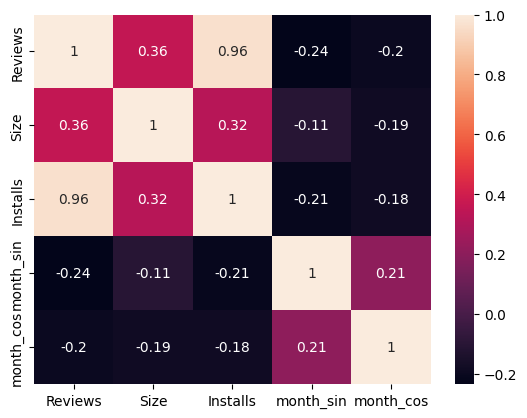

In [ ]:
col=["Reviews", "Size","Installs","month_sin",  "month_cos"  ]
corre=X_resampled[col].corr()
sns.heatmap(corre,annot=True)

In [ ]:
corre

,Reviews,Size,Installs,month_sin,month_cos
Reviews,1.000000,0.355304,0.962280,-0.235060,-0.199286
Size,0.355304,1.000000,0.324037,-0.109433,-0.186189
Installs,0.962280,0.324037,1.000000,-0.212581,-0.182712
month_sin,-0.235060,-0.109433,-0.212581,1.000000,0.206769
month_cos,-0.199286,-0.186189,-0.182712,0.206769,1.000000


In [ ]:
top_categories = X_train['Category'].value_counts().nlargest(10).index
X_resampled['Category_grouped'] = X_train['Category'].apply(lambda x: x if x in top_categories else 'Other')

# classification

In [ ]:
dataset.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Primary_genre,Secondary_genre,Update_Year,update_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000,Free,0.0,0+,Art & Design,2018-01-07,Art & Design,None,2018,1
1,Coloring book moana,art_and_design,3.9,967,14.0,500000,Free,0.0,0+,Art & Design;Pretend Play,2018-01-15,Art & Design,Pretend Play,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000,Free,0.0,0+,Art & Design,2018-08-01,Art & Design,None,2018,8


In [ ]:
df=dataset.copy()
df.dropna(subset=["Rating"])
df=df[df['Category']!='1.9']

In [ ]:
df["month_sin"]=np.sin(2*np.pi*df["update_month"]/12)
df["month_cos"]=np.cos(2*np.pi*df["update_month"]/12)
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Primary_genre',
       'Secondary_genre', 'Update_Year', 'update_month', 'month_sin',
       'month_cos'],
      dtype='object')

In [ ]:
top_categories=df["Category"].value_counts().nlargest(10).index
df['Category_grouped']=df['Category'].apply(lambda x: x if x in top_categories else "other")
df["Category_grouped"].value_counts()

,count
Category_grouped,
other,3187
family,1718
game,1074
tools,734
productivity,334
finance,317
personalization,310
communication,307
lifestyle,305


In [ ]:
top_genres=df["Primary_genre"].value_counts().nlargest(10).index
df["Primary_genre_grouped"]=df["Primary_genre"].apply(lambda x: x if x in top_genres else "other")
df["Primary_genre_grouped"].value_counts()

,count
Primary_genre_grouped,
other,4849
Tools,734
Entertainment,538
Education,528
Action,364
Productivity,334
Finance,317
Personalization,310
Communication,308


In [ ]:
df['Content Rating'].unique()

array(['0+', '13+', '10+', '17+', '18+', 'Unrated'], dtype=object)

In [ ]:
rating_group_map = {
    '0+': 'Everyone',
    '13+': 'Upto 18',
    '10+': 'Upto 18',
    '17+': 'Upto 18',
    '18+': 'Above 18',
    'Unrated': 'Unrated'
}

df['Content_Rating_Grouped'] = df['Content Rating'].map(rating_group_map)
df['Content_Rating_Grouped'].value_counts()


,count
Content_Rating_Grouped,
Everyone,7095
Upto 18,1793
Above 18,3
Unrated,1


In [ ]:
df['is_paid'] = df['Type'].apply(lambda x: 1 if x == 'Paid' else 0)


In [ ]:
df['Installs'].skew()

np.float64(9.375744518924014)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Primary_genre,Secondary_genre,Update_Year,update_month,month_sin,month_cos,Category_grouped,Primary_genre_grouped,Content_Rating_Grouped,is_paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000,Free,0.0,0+,Art & Design,...,Art & Design,None,2018,1,5.000000e-01,0.866025,other,other,Everyone,0
1,Coloring book moana,art_and_design,3.9,967,14.0,500000,Free,0.0,0+,Art & Design;Pretend Play,...,Art & Design,Pretend Play,2018,1,5.000000e-01,0.866025,other,other,Everyone,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000,Free,0.0,0+,Art & Design,...,Art & Design,None,2018,8,-8.660254e-01,-0.500000,other,other,Everyone,0
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000,Free,0.0,13+,Art & Design,...,Art & Design,None,2018,6,1.224647e-16,-1.000000,other,other,Upto 18,0
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000,Free,0.0,0+,Art & Design;Creativity,...,Art & Design,Creativity,2018,6,1.224647e-16,-1.000000,other,other,Everyone,0


In [ ]:
df.drop(columns=[
    'App', 'Category', 'Primary_genre', 'Secondary_genre',
    'Genres', 'Last Updated', 'Content Rating', 'Update_Year', 'update_month',
], inplace=True)


In [ ]:
x=df.drop(["Rating",'Type','Price'],axis=1)
y=df["Rating"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True)

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
x_train[['Reviews', 'Size', 'Installs']] = pt.fit_transform(x_train[['Reviews', 'Size', 'Installs']])
x_test[['Reviews', 'Size', 'Installs']] = pt.transform(x_test[['Reviews', 'Size', 'Installs']])


In [ ]:
x_train.head(2)

,Reviews,Size,Installs,month_sin,month_cos,Category_grouped,Primary_genre_grouped,Content_Rating_Grouped,is_paid
1807,0.860900,-0.000752,0.844072,-5.000000e-01,-0.866025,game,other,Upto 18,0
6017,-0.711052,-1.075834,-0.803774,1.224647e-16,-1.000000,productivity,Productivity,Everyone,0


In [ ]:
cat_col=["Content_Rating_Grouped","Category_grouped","Primary_genre_grouped","is_paid"]
for col in cat_col:
    le=LabelEncoder()
    combined=pd.concat([x_train[col],x_test[col]],axis=0)
    le.fit(combined)
    x_train[col]=le.transform(x_train[col])
    x_test[col]=le.transform(x_test[col])



In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6669 entries, 1807 to 8751
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Reviews                 6669 non-null   float64
 1   Size                    6669 non-null   float64
 2   Installs                6669 non-null   float64
 3   month_sin               6669 non-null   float64
 4   month_cos               6669 non-null   float64
 5   Category_grouped        6669 non-null   int64  
 6   Primary_genre_grouped   6669 non-null   int64  
 7   Content_Rating_Grouped  6669 non-null   int64  
 8   is_paid                 6669 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 521.0 KB


In [ ]:
x_train.head(2)


,Reviews,Size,Installs,month_sin,month_cos,Category_grouped,Primary_genre_grouped,Content_Rating_Grouped,is_paid
1807,0.860900,-0.000752,0.844072,-5.000000e-01,-0.866025,3,10,3,0
6017,-0.711052,-1.075834,-0.803774,1.224647e-16,-1.000000,9,8,1,0


/tmp/ipython-input-2854457753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='Rating', ylabel='Density'>

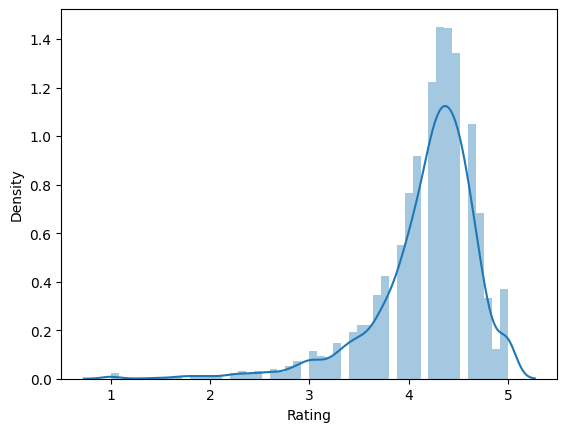

In [ ]:
sns.distplot(y_train)


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
abs=mean_absolute_error(y_test,y_pred)

print(f"Baseline RMSE: {rmse:.4f}")
print(f"Baseline R² Score: {r2:.4f}")
print(f"Baseline Absolute Error: {abs:.4f}")


Baseline RMSE: 0.2432
Baseline R² Score: 0.0939
Baseline Absolute Error: 0.3269


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
# grid_rf.fit(x_train, y_train)

# rf_best = grid_rf.best_estimator_
# rf_pred = rf_best.predict(x_test)

# print("Random Forest")
# print("Best Params:", grid_rf.best_params_)
# print("RMSE:", mean_squared_error(y_test, rf_pred))
# print("MAE:", mean_absolute_error(y_test, rf_pred))
# print("R²:", r2_score(y_test, rf_pred))


#======================== output==========

# Fitting 5 folds for each of 16 candidates, totalling 80 fits
# Random Forest
# Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# RMSE: 0.23406476937478649
# MAE: 0.32702039979671643
# R²: 0.1278583423671268


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
RMSE: 0.23406476937478649
MAE: 0.32702039979671643
R²: 0.1278583423671268


In [ ]:
x_train

,Reviews,Size,Installs,month_sin,month_cos,Category_grouped,Primary_genre_grouped,Content_Rating_Grouped,is_paid
1807,0.860900,-0.000752,0.844072,-5.000000e-01,-8.660254e-01,3,10,3,0
6017,-0.711052,-1.075834,-0.803774,1.224647e-16,-1.000000e+00,9,8,1,0
3559,0.475308,-0.000752,0.386736,-5.000000e-01,-8.660254e-01,9,8,1,0
4540,-1.393115,-1.483741,-0.803774,-1.000000e+00,-1.836970e-16,1,2,1,0
861,0.851506,-0.000752,0.844072,1.224647e-16,-1.000000e+00,6,3,1,0
...,...,...,...,...,...,...,...,...,...
6760,-1.138275,-1.738320,-1.338684,5.000000e-01,-8.660254e-01,6,10,1,1
6038,-1.063483,-0.071368,-0.968828,-1.000000e+00,-1.836970e-16,6,10,1,0
6295,1.044639,1.412338,1.048097,-8.660254e-01,-5.000000e-01,1,2,1,0
1069,0.459207,-0.000752,0.386736,-5.000000e-01,-8.660254e-01,2,4,1,0


In [ ]:
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), param_grid_xgb, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_xgb.fit(x_train, y_train)

xgb_best = grid_xgb.best_estimator_
xgb_pred = xgb_best.predict(x_test)

print("\nXGBoost")
print("Best Params:", grid_xgb.best_params_)
print("RMSE:", mean_squared_error(y_test, xgb_pred))
print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("R²:", r2_score(y_test, xgb_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits

XGBoost
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
RMSE: 0.23546770726290306
MAE: 0.33255111104027407
R²: 0.12263089793554405


In [ ]:
from sklearn.svm import SVR

param_grid_svr = {
    'kernel': ['rbf'],
    'C': [1, 10],
    'epsilon': [0.1, 0.2],
    'gamma': ['scale']
}

grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
grid_svr.fit(x_train, y_train)

svr_best = grid_svr.best_estimator_
svr_pred = svr_best.predict(x_test)

print("\nSVR")
print("Best Params:", grid_svr.best_params_)
print("RMSE:", mean_squared_error(y_test, svr_pred))
print("MAE:", mean_absolute_error(y_test, svr_pred))
print("R²:", r2_score(y_test, svr_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits

SVR
Best Params: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
RMSE: 0.23750200952615952
MAE: 0.3172579360314311
R²: 0.11505094580203046


In [ ]:
y_class_train = pd.cut(y_train, bins=[0, 3.9, 4.3,5.0], labels=['Low', 'Medium', 'High'])
y_class_test = pd.cut(y_test, bins=[0, 3.9, 4.3,5.0], labels=['Low', 'Medium', 'High'])

In [ ]:
print(y_class_train.shape," y_train shape")
print(x_train.shape," x_train shape")
print(y_class_test.shape," y_test shape")
print(x_test.shape," x_test shape")


(6669,)  y_train shape
(6669, 9)  x_train shape
(2223,)  y_test shape
(2223, 9)  x_test shape


In [ ]:
y_class_test.value_counts()

,count
Rating,
High,994
Medium,776
Low,453


In [ ]:
y_class_train.value_counts()


,count
Rating,
High,2853
Medium,2324
Low,1492


Classification Report:

              precision    recall  f1-score   support

   Excellent       0.41      0.51      0.45       266
        High       0.55      0.46      0.50       728
         Low       0.37      0.48      0.42       453
      Medium       0.51      0.46      0.48       776

    accuracy                           0.47      2223
   macro avg       0.46      0.48      0.46      2223
weighted avg       0.48      0.47      0.47      2223



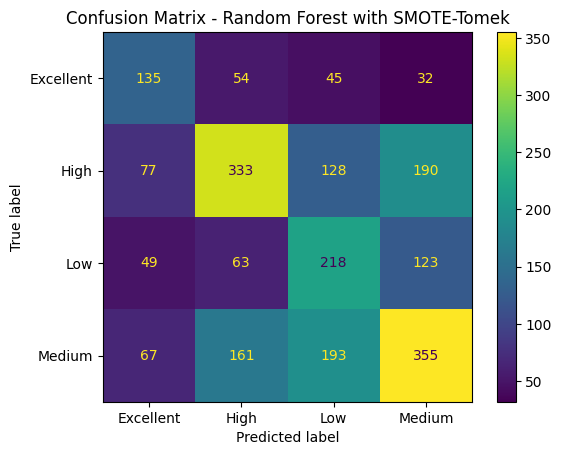

In [ ]:
# from imblearn.combine import SMOTETomek
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# from sklearn.model_selection import GridSearchCV


# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_class_train)

# # Step 3: Train classifier
# rf_clf = RandomForestClassifier(random_state=42)
# rf_clf.fit(X_resampled, y_resampled)

# # Step 4: Predict and evaluate
# y_pred = rf_clf.predict(x_test)
# print("Classification Report:\n")
# print(classification_report(y_class_test, y_pred))

# # Step 5: Visualize confusion matrix
# ConfusionMatrixDisplay.from_estimator(rf_clf, x_test, y_class_test)
# plt.title("Confusion Matrix - Random Forest with SMOTE-Tomek")
# plt.show()

# Classification Report:

#               precision    recall  f1-score   support

#    Excellent       0.41      0.51      0.45       266
#         High       0.55      0.46      0.50       728
#          Low       0.37      0.48      0.42       453
#       Medium       0.51      0.46      0.48       776

#     accuracy                           0.47      2223
#    macro avg       0.46      0.48      0.46      2223
# weighted avg       0.48      0.47      0.47      2223


Classification Report:

              precision    recall  f1-score   support

        High       0.64      0.63      0.64       994
         Low       0.39      0.46      0.42       453
      Medium       0.52      0.48      0.50       776

    accuracy                           0.54      2223
   macro avg       0.52      0.52      0.52      2223
weighted avg       0.55      0.54      0.55      2223



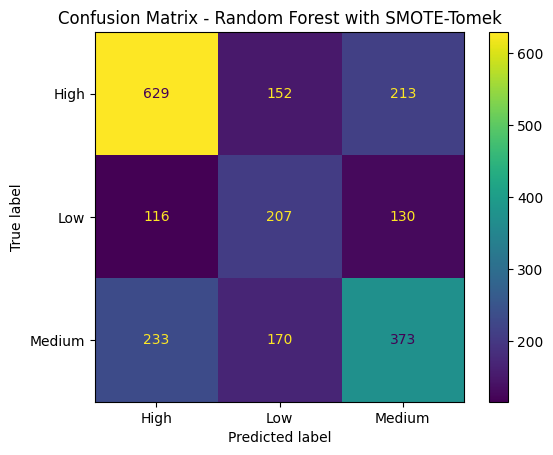

In [ ]:
from imblearn.over_sampling  import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_class_train)

# Step 3: Train classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_resampled, y_resampled)

# Step 4: Predict and evaluate
y_pred = rf_clf.predict(x_test)
print("Classification Report:\n")
print(classification_report(y_class_test, y_pred))

# Step 5: Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, x_test, y_class_test)
plt.title("Confusion Matrix - Random Forest with SMOTE-Tomek")
plt.show()

In [ ]:
X_resampled.head(5)

,Reviews,Size,Installs,month_sin,month_cos,Category_grouped,Primary_genre_grouped,Content_Rating_Grouped,is_paid
0,0.860900,-0.000752,0.844072,-5.000000e-01,-8.660254e-01,3,10,3,0
1,-0.711052,-1.075834,-0.803774,1.224647e-16,-1.000000e+00,9,8,1,0
2,0.475308,-0.000752,0.386736,-5.000000e-01,-8.660254e-01,9,8,1,0
3,-1.393115,-1.483741,-0.803774,-1.000000e+00,-1.836970e-16,1,2,1,0
4,0.851506,-0.000752,0.844072,1.224647e-16,-1.000000e+00,6,3,1,0


In [ ]:
y_resampled.value_counts()

,count
Rating,
Low,2853
Medium,2853
High,2853


In [ ]:
X_resampled.describe()

,Reviews,Size,Installs,month_sin,month_cos,Category_grouped,Primary_genre_grouped,Content_Rating_Grouped,is_paid
count,8559.000000,8559.000000,8559.000000,8559.000000,8.559000e+03,8559.000000,8559.000000,8559.000000,8559.000000
mean,-0.075826,-0.032787,-0.053457,-0.120362,-3.932387e-01,4.771469,7.608015,1.394322,0.057250
std,0.976249,0.999902,0.971521,0.632693,6.482938e-01,2.905720,3.319475,0.795976,0.232333
min,-1.963133,-2.465723,-2.608003,-1.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,-0.887292,-0.757535,-0.803774,-0.500000,-8.660254e-01,2.000000,5.000000,1.000000,0.000000
50%,-0.065671,-0.000752,-0.229535,-0.500000,-6.909718e-01,6.000000,10.000000,1.000000,0.000000
75%,0.667191,0.624412,0.844072,0.500000,6.123234e-17,6.000000,10.000000,1.000000,0.000000
max,2.605217,2.130892,2.519516,1.000000,1.000000e+00,10.000000,10.000000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_map = {'Low': 0, 'Medium': 1, 'High': 2}
y_resampled_ord = y_resampled.map(ordinal_map)
y_class_test_ord = y_class_test.map(ordinal_map)

In [ ]:

X_resampled.drop(columns=['Installs'], inplace=True)

x_test.drop(columns=['Installs'], inplace=True)


KeyError: "['Installs'] not found in axis"

In [ ]:

X_resampled.drop(columns=['is_paid'], inplace=True)
x_test.drop(columns=['is_paid'], inplace=True)


Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.40      0.36       453
           1       0.48      0.47      0.48       776
           2       0.58      0.53      0.55       994

    accuracy                           0.48      2223
   macro avg       0.46      0.47      0.46      2223
weighted avg       0.49      0.48      0.49      2223



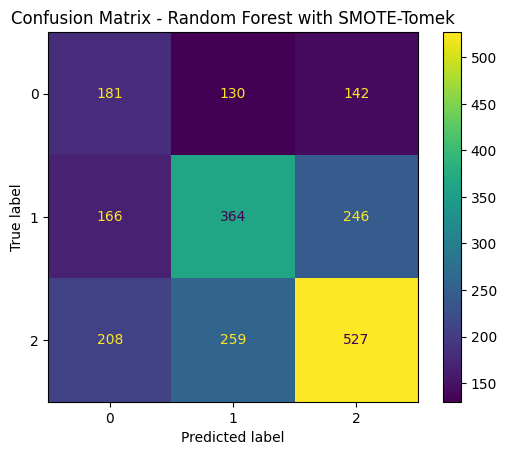

In [ ]:
from imblearn.over_sampling  import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=True,
    class_weight=None,
    random_state=42
)
rf_clf.fit(X_resampled, y_resampled_ord)

# Step 4: Predict and evaluate
y_pred = rf_clf.predict(x_test)
print("Classification Report:\n")
print(classification_report(y_class_test_ord, y_pred))

# Step 5: Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, x_test,y_class_test_ord )
plt.title("Confusion Matrix - Random Forest with SMOTE-Tomek")
plt.show()

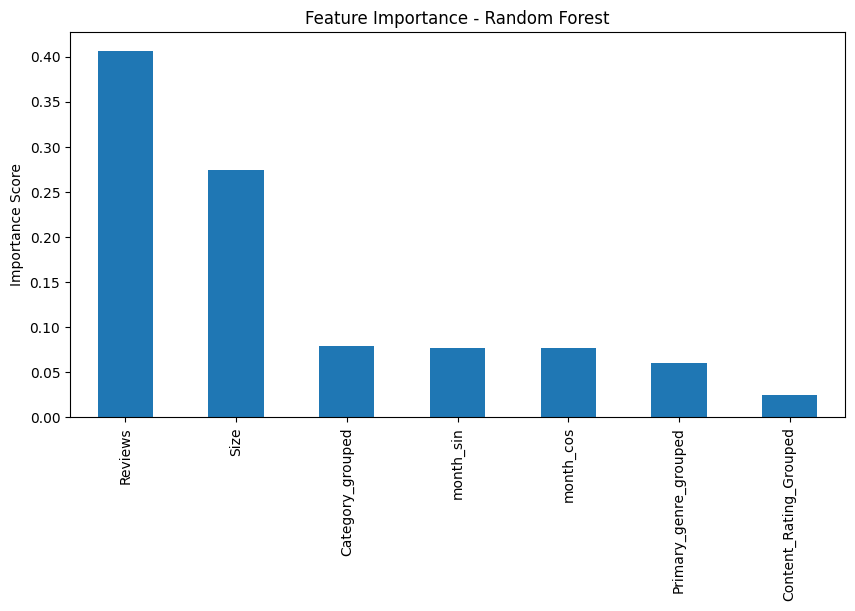

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_clf.feature_importances_, index=X_resampled.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
X_resampled


,Reviews,Size,month_sin,month_cos,Category_grouped,Primary_genre_grouped,Content_Rating_Grouped
0,0.860900,-0.000752,-5.000000e-01,-8.660254e-01,3,10,3
1,-0.711052,-1.075834,1.224647e-16,-1.000000e+00,9,8,1
2,0.475308,-0.000752,-5.000000e-01,-8.660254e-01,9,8,1
3,-1.393115,-1.483741,-1.000000e+00,-1.836970e-16,1,2,1
4,0.851506,-0.000752,1.224647e-16,-1.000000e+00,6,3,1
...,...,...,...,...,...,...,...
8554,1.348825,0.032909,-5.411923e-01,-8.248331e-01,3,10,1
8555,0.443843,0.530753,-8.660254e-01,-5.000000e-01,6,10,1
8556,0.911845,0.092381,-8.660254e-01,-5.000000e-01,6,10,3
8557,0.233528,-2.106068,-8.660254e-01,-5.000000e-01,10,9,1


In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

te = TargetEncoder()
x_train_te = X_resampled.copy()
x_test_te = x_test.copy()

for col in cat_cols:
    te.fit(x_train_te[col], y_resampled_ord)
    x_train_te[col] = te.transform(x_train_te[col])
    x_test_te[col] = te.transform(x_test[col])


✅ Accuracy: 0.48223121907332434
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.39      0.36       453
           1       0.48      0.46      0.47       776
           2       0.56      0.54      0.55       994

    accuracy                           0.48      2223
   macro avg       0.46      0.46      0.46      2223
weighted avg       0.49      0.48      0.48      2223



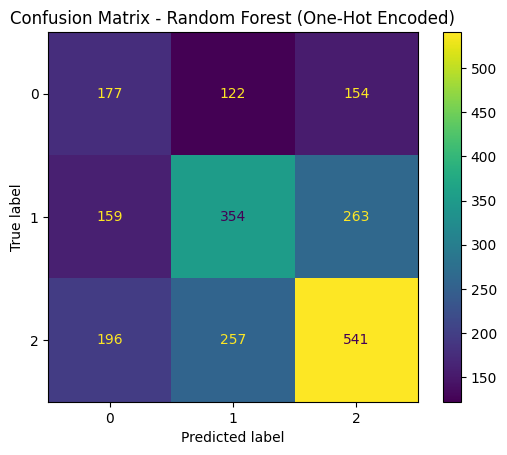

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

rf_best = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=True,
    class_weight=None,
    random_state=42
)

rf_best.fit(x_train_te, y_resampled_ord)
y_pred_rf = rf_best.predict(x_test_te)

print("✅ Accuracy:", accuracy_score(y_class_test_ord, y_pred_rf))
print("📊 Classification Report:\n", classification_report(y_class_test_ord, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf_best, x_test_te, y_class_test_ord)
plt.title("Confusion Matrix - Random Forest (One-Hot Encoded)")
plt.show()


model comparision


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=5,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       verbose=2)

grid_rf.fit(X_resampled, y_resampled)
rf_best = grid_rf.best_estimator_
y_pred_rf = rf_best.predict(x_test)

print("🔍 Random Forest Best Parameters:", grid_rf.best_params_)
print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_rf))
print(classification_report(y_class_test, y_pred_rf))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
🔍 Random Forest Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
✅ Accuracy: 0.4817813765182186
              precision    recall  f1-score   support

   Excellent       0.43      0.47      0.45       266
        High       0.55      0.48      0.52       728
         Low       0.38      0.47      0.42       453
      Medium       0.51      0.49      0.50       776

    accuracy                           0.48      2223
   macro avg       0.47      0.48      0.47      2223
weighted avg       0.49      0.48      0.48      2223



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       param_grid_gb,
                       cv=5,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       verbose=3)

grid_gb.fit(X_resampled, y_resampled)
gb_best = grid_gb.best_estimator_
y_pred_gb = gb_best.predict(x_test)

print("🔍 Gradient Boosting Best Parameters:", grid_gb.best_params_)
print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_gb))
print(classification_report(y_class_test, y_pred_gb))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


In [ ]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}


grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                        param_grid_xgb,
                        cv=5,
                        scoring='f1_weighted',
                        n_jobs=-1,
                        verbose=3)

grid_xgb.fit(X_resampled, y_resampled)
xgb_best = grid_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(x_test)

print("🔍 XGBoost Best Parameters:", grid_xgb.best_params_)
print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_xgb))
print(classification_report(y_class_test, y_pred_xgb))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


param_grids_svm = {
    "poly": {
        'C': [0.1, 1, 10],
        'kernel': ['poly'],
        'degree': [2, 3],
        'gamma': ['scale', 'auto'],
        'class_weight': [None, 'balanced']
    },
    "rbf": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto'],
        'class_weight': [None, 'balanced']
    },
    "linear": {
        'C': [0.1, 1, 10],
        'kernel': ['linear'],
        'class_weight': [None, 'balanced']
    }
}


for kernel_name, param_grid in param_grids_svm.items():
    print(f"\n🔍 Running GridSearchCV for SVM with {kernel_name} kernel...")
    try:
        grid_svm = GridSearchCV(SVC(),
                                param_grid,
                                cv=5,
                                scoring='f1_weighted',
                                n_jobs=-1,
                                verbose=3)
        grid_svm.fit(X_resampled, y_resampled)
        svm_best = grid_svm.best_estimator_
        y_pred_svm = svm_best.predict(x_test)

        print(f"✅ SVM ({kernel_name}) Best Parameters:", grid_svm.best_params_)
        print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_svm))
        print(classification_report(y_class_test, y_pred_svm))
    except Exception as e:
        print(f"❌ Error with SVM ({kernel_name}) kernel: {e}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


param_grid_lr_l1 = {
    'penalty': ['l1'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [500, 1000]
}

param_grid_lr_l2 = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [500, 1000]
}

param_grid_lr_elastic = {
    'penalty': ['elasticnet'],
    'C': [0.1, 1, 10],
    'solver': ['saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [500, 1000],
    'l1_ratio': [0.5, 0.7]
}
grids_lr = {
    "L1": param_grid_lr_l1,
    "L2": param_grid_lr_l2,
    "ElasticNet": param_grid_lr_elastic
}

for name, param_grid in grids_lr.items():
    print(f"\n🔍 Running GridSearchCV for Logistic Regression ({name})...")
    try:
        grid_lr = GridSearchCV(LogisticRegression(),
                               param_grid,
                               cv=5,
                               scoring='f1_weighted',
                               n_jobs=-1,
                               verbose=3)
        grid_lr.fit(X_resampled, y_resampled)
        lr_best = grid_lr.best_estimator_
        y_pred_lr = lr_best.predict(x_test)

        print(f"✅ Logistic Regression ({name}) Best Parameters:", grid_lr.best_params_)
        print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_lr))
        print(classification_report(y_class_test, y_pred_lr))
    except Exception as e:
        print(f"❌ Error with Logistic Regression ({name}): {e}")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid_knn,
                        cv=5,
                        scoring='f1_weighted',
                        n_jobs=-1,
                        verbose=3)

grid_knn.fit(X_resampled, y_resampled)
knn_best = grid_knn.best_estimator_
y_pred_knn = knn_best.predict(x_test)

print("🔍 KNN Best Parameters:", grid_knn.best_params_)
print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_knn))
print(classification_report(y_class_test, y_pred_knn))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_dt,
                       cv=5,
                       scoring='f1_weighted',
                       n_jobs=-1,
                       verbose=3)

grid_dt.fit(X_resampled, y_resampled)
dt_best = grid_dt.best_estimator_
y_pred_dt = dt_best.predict(x_test)

print("🔍 Decision Tree Best Parameters:", grid_dt.best_params_)
print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_dt))
print(classification_report(y_class_test, y_pred_dt))
